In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sbpcreator as sc
import numpy as np
import os
import copy
import sys
import logging
sys.path.append("..\\")
from pythonGUI.config import cfg
SBPFOLDER = cfg.shopbot.sbpFolder

In [3]:
slideW = 25 # mm
slideH = 75 # mm
margin = 5 # mm
#spacing = (slideH-2*margin)/12 # mm
spacing=5
nid = 0.603 # nozzle inner diameter
nd = nid + 0.152*2 # mm # nozzle = 0.603 mm ID x 0.152 mm OD x 1.5" tall (20 gauge needle)
downdisp = 0
wait1=1.5
wait2=0.5
waitDPic = 0.75
waitDSnap = 0.25
waitDO = 3

dv = sc.defVars(slideW=slideW, slideH = slideH, margin=margin, spacing=spacing, nid=nid, nd=nd
                , downdisp=downdisp, waitDPic = waitDPic, waitDSnap=waitDSnap, waitDO=waitDO
                , runFlag1=cfg.shopbot.flag1, basFlag1=cfg.camera.cam0.flag1, flowFlag1=cfg.fluigent.channel0.flag1
               , dummyFlag1=1)
dv.setUnits()
dv.setSpeeds(m=10, j=20)
dv.setRamps()
# dv.turnOn(0);

In [9]:
import random

def randomizedList(fn:str) -> None:
    '''generate a list with randomized order'''
    out = ''
    groups = [f'disturb{s1}' for num in [1,2,3] for s1 in [f'Horiz3_{num}', f'Vert2_{num}', f'XS2_{num}_+y', f'XS2_{num}_+z']]
    while len(groups)>0:
        i = random.randint(0, len(groups)-1)
        base = groups.pop(i)
        nums = ['0.500', '0.625', '0.750', '0.875', '1.000', '1.250']
        while len(nums)>0:
            j = random.randint(0, len(nums)-1)
            num = nums.pop(j)
            out = f'{out}{base}_{num}.sbp\n'
        out = f'{out}BREAK\n'
    File_object = open(fn,"w")
    File_object.write(out)
    File_object.close()
for k in range(20):
    randomizedList(os.path.join(r'C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb', f'_singleDisturbShiftList{k:02}.txt'))

### triple line spacing sweep

##### tripleLinesXS

###### writing

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXS_+y_

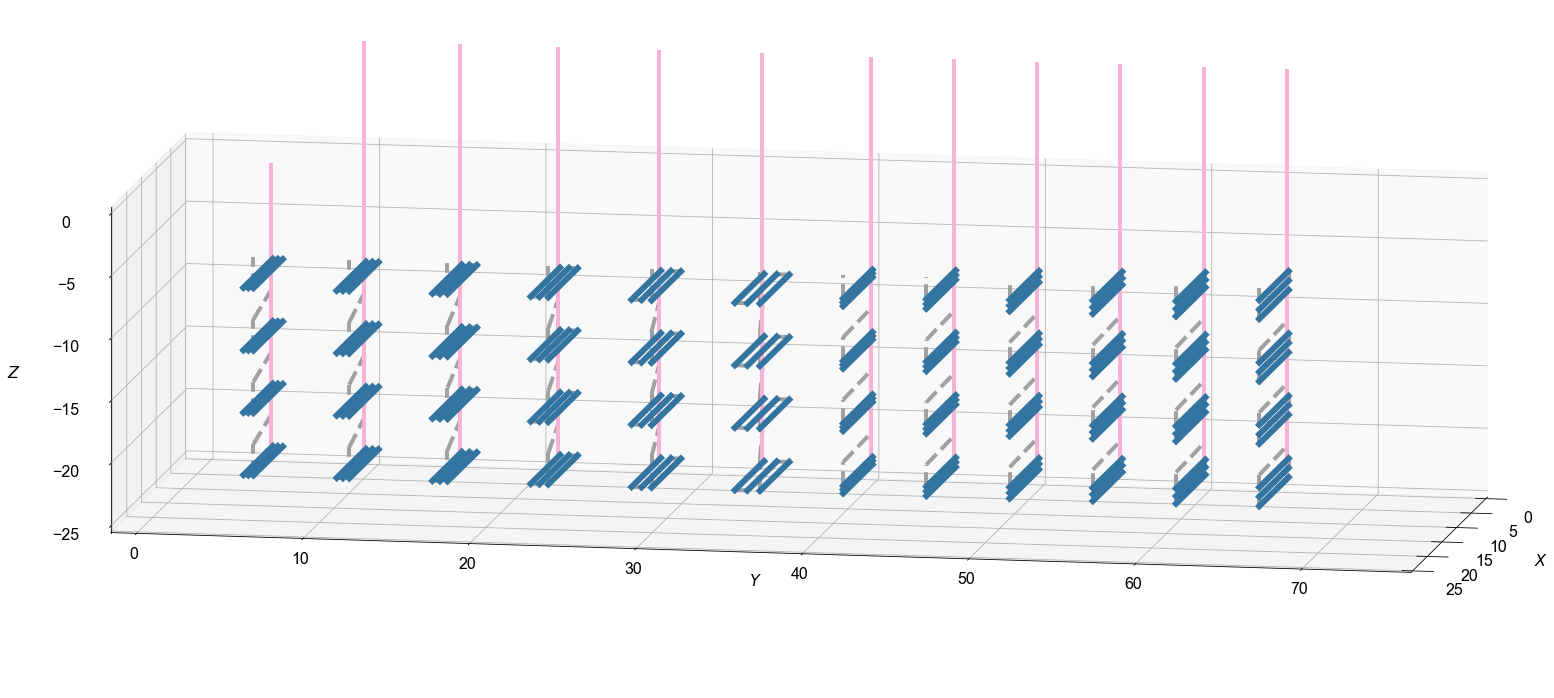

In [9]:
ylast = 0
total2 = copy.deepcopy(dv)
# total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)

# head-on, in plane
for shortdir in ['+y', '+z']:
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
#         total.addVar('nid', 0.603)
        if i==0 and shortdir=='+y':
            total = total + sc.startingPoint(0,0,0)
        else:
            total = total + sc.startingPoint(zz.cp[0], zz.cp[1], zz.cp[2])
        total.prime(0)

        for z0frac in [0.9, 0.7, 0.5, 0.3]:
            zz = sc.zigzag(lastPt=total2, killZigs=True)
            zz.x0 = '&slideW/2-&margin'
            zz.y0 = f'&margin+{ylast}'
            zz.z0 = f'-{z0frac}*&slideW'
            zz.width = f'2*&margin'
            zz.spacing1 = f'&nid*{spacing}'
            zz.spacing2 = f'&nid*{spacing}'
            zz.reps=3
            zz.shortdir = shortdir
            zz.sbp() # create zigzag
            zz.jz(f'-{z0frac-0.1}*&slideW')  # go halfway to next layer
            
        
            total = total + zz
            total2 = total2+zz
            zz1 = copy.deepcopy(zz)
        ylast = zz.cp[1]
        total.jz(10)
        total2.jz(10)
        total.turnOff(cfg.shopbot.flag1-1)
        total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'tripleLinesXS_{shortdir}_{spacing:.3f}.sbp'), [])

total2.turnOff(cfg.shopbot.flag1-1)
total2.mz(10)        
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'tripleLinesXS.png'), grids=False)
total2.plot(ele=10, azi=10, export=False, grids=True)
# print(total.convertFile('spacing'))

###### pics

0.000 mL, 2 min 59 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXSPics.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesXSPics.csv


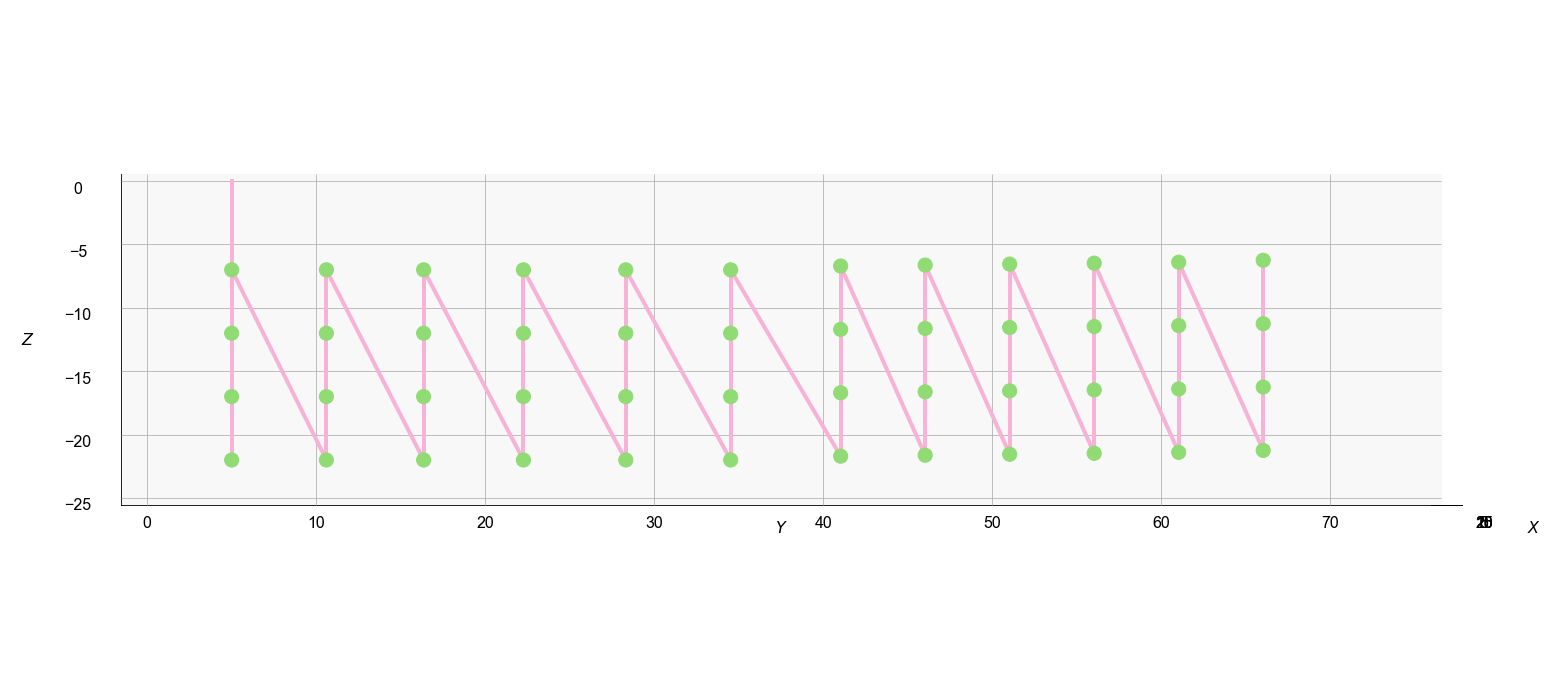

In [11]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(cfg.shopbot.flag1-1)
total.setSpeeds(m=5, j=20)
ylast = 0

pic = sc.pics(channel=2, wait=2, lastPt=total)
x = '&slideW/2'
pic.j2('&slideW/2', f'{ylast}+&margin')
# head-on, in plane
for shortdir in ['+y', '+z']:
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        y = f'{ylast}+&margin'
#         print(pic.floatSC(f'{ylast}+&margin'))
        for z0frac in [0.9, 0.7, 0.5, 0.3]:
            for dz in [0.5]:
                if shortdir=='+y':
                    pic.m3(x,y,f'-{z0frac}*&slideW+{dz}')
                else:
                    pic.m3(x,y,f'-{z0frac}*&slideW+{dz}+&nid*{spacing}')
                pic.snap()
        if shortdir=='+y':
            ylast = f'{pic.cp[1]}+2*&nid*{spacing}'
        else:
            ylast = f'{pic.cp[1]}'
        

total = total+pic
        
total.turnOff(cfg.shopbot.flag1-1)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  'tripleLinesXSPics.sbp'), [])
# print(total.convertFile('spacing'))

##### disturb XS

###### inline version

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS_+y_1.000.sbp
Exported points to C:\Users\lmf1\Documents\G

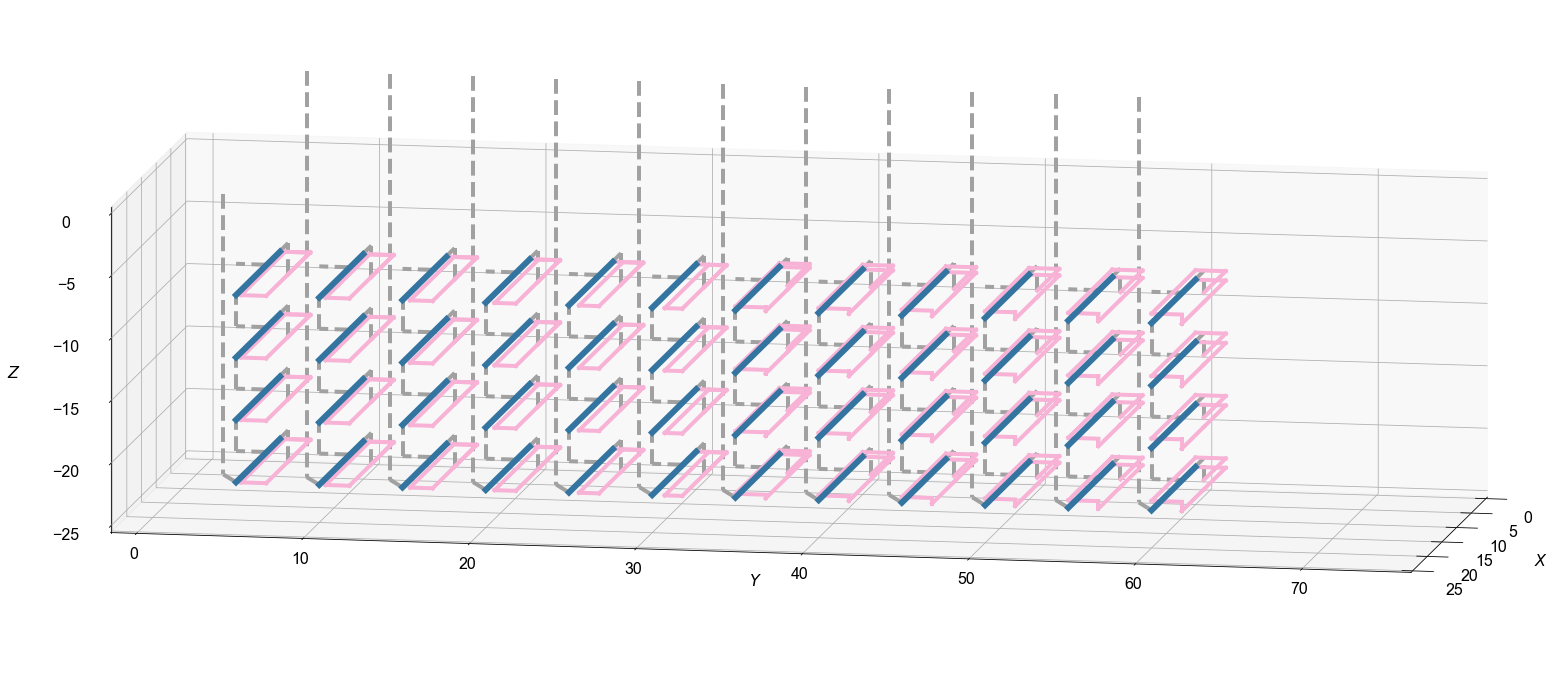

In [16]:
ylast = 0
total2 = copy.deepcopy(dv)
# total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
speed=10
dv.setSpeeds(m=speed, j=20)
# head-on, in plane
for shortdir in ['+y', '+z']:
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
#         total.addVar('nid', 0.603)
        if i==0 and shortdir=='+y':
            total = total + sc.startingPoint(0,0,0)
        else:
            total = total + sc.startingPoint(zz.cp[0], zz.cp[1], zz.cp[2])
            
        total.j2('&slideW/2+&margin', f'&margin+{ylast}-2*&nid')
        total2.j2('&slideW/2+&margin', f'&margin+{ylast}-2*&nid')
        total.prime(0)

        
        total.jz(f'-0.9*&slideW')
        total2.jz(f'-0.9*&slideW')

        for z0frac in [0.9, 0.7, 0.5, 0.3]:
            # write line 1
            zz = sc.sbpCreator(lastPt=total2)
            x0 = '&slideW/2+&margin*1.5'
            xf = '&slideW/2-&margin*1.5'
            zz.j3(x0, f'&margin+{ylast}', f'-{z0frac}*&slideW')
            zz.turnOn(0)
            zz.mx(xf, pOn=True)
            zz.turnOff(0)
            # move to side
            zz.my(f'&margin+{ylast}+3*&nid')
            # move to middle and pause for image
            zz.mx('&slideW/2')
            zz.pause(1)
            # move to back
            zz.mx(x0)
            # move back to spacing
            if shortdir=='+y':
                zz.my(f'&margin+{ylast}+&nid*{spacing}')
            else:
                zz.mz(f'-{z0frac}*&slideW+&nid*{spacing}')
                zz.my(f'&margin+{ylast}')
            # move to front
            zz.mx(xf)
            # move to side
            zz.my(f'&margin+{ylast}+3*&nid')
            # move to middle and pause for image
            zz.mx('&slideW/2')
            zz.pause(1)
            zz.jz(f'-{z0frac-0.1}*&slideW')  # go halfway to next layer
            zz.jx(x0)
            zz.jy(f'&margin+{ylast}')
        
            total = total + zz
            total2 = total2+zz
            zz1 = copy.deepcopy(zz)
        ylast = zz.cp[1]
        total.jz(10)
        total2.jz(10)
        total.turnOff(cfg.shopbot.flag1-1)
        total.export(os.path.join(SBPFOLDER,'singleDisturb',  f'disturbXS_{shortdir}_{spacing:.3f}.sbp'), [])

total2.turnOff(cfg.shopbot.flag1-1)
total2.mz(10)        
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbXS.png'), grids=False)
total2.plot(ele=10, azi=10, export=False, grids=True)
# print(total.convertFile('spacing'))

###### shifted, manual

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_+y_1.000.sbp
Exported points to C:\Users\lmf1\Do

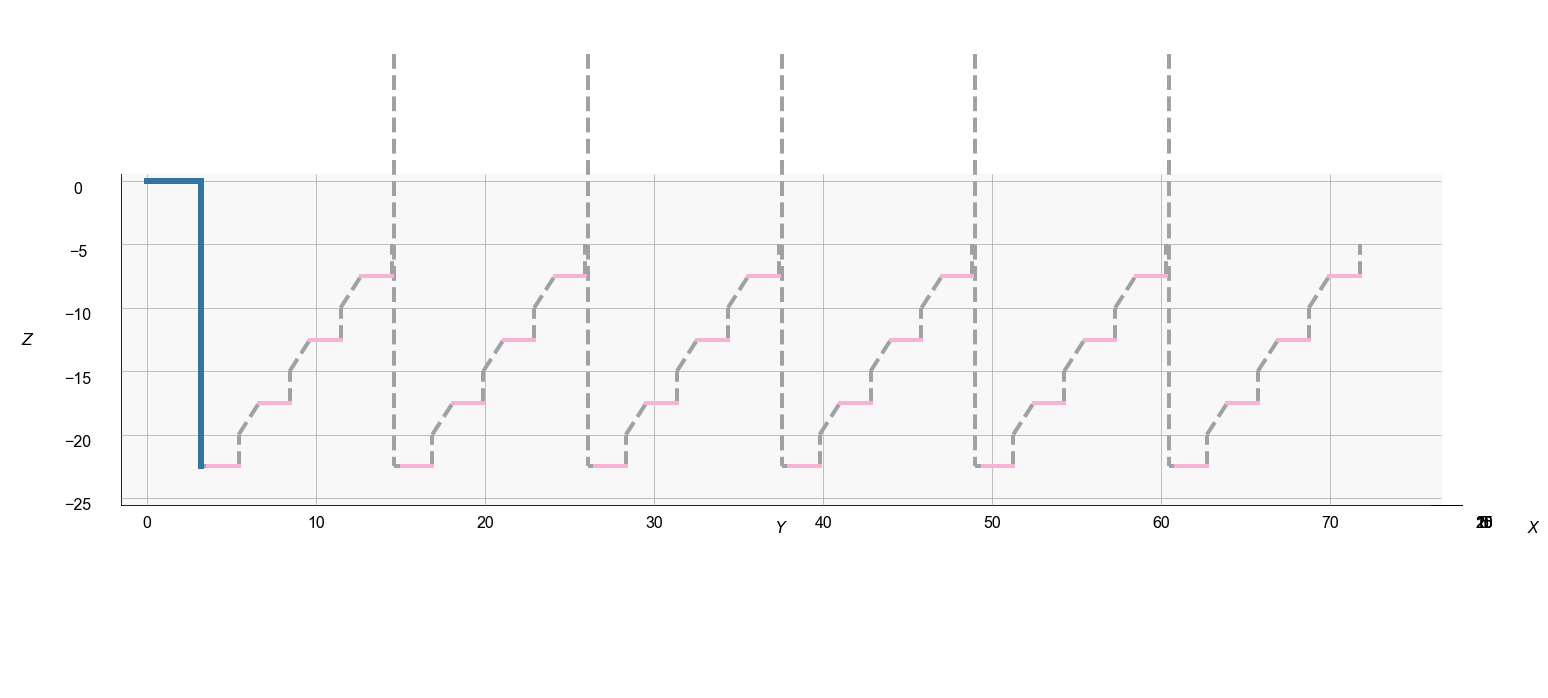

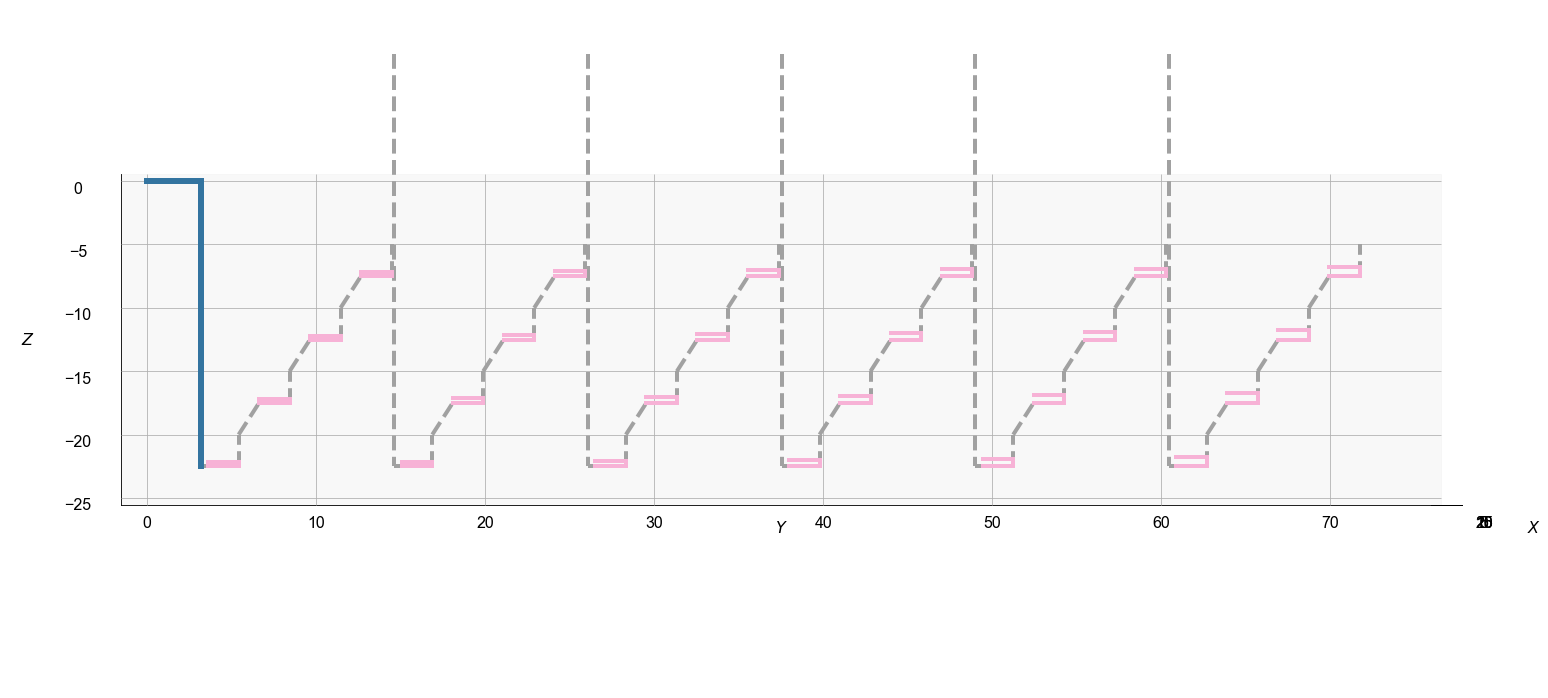

In [58]:
wait3 = 3
for shortdir in ['+y', '+z']:
    ylast = 3
    total2 = copy.deepcopy(dv)
    total2 = total2 + sc.startingPoint(0,0,0)
    total2.turnOn(cfg.shopbot.flag1-1)
    # head-on, in plane
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        if i==0 and shortdir=='+y':
            total = total + sc.startingPoint(0,0,0)
        else:
            total = total + sc.startingPoint(zz.cp[0], zz.cp[1], zz.cp[2])
            
        y00 = f'&margin+{ylast}-{(0.9-0.3)/0.1}*&nid-2*&nid'
        total.j2('&slideW/2+&margin', y00)
        total2.j2('&slideW/2+&margin', y00)
        total.prime('&dummyFlag')
        total.jz(f'-0.9*&slideW')
        total2.jz(f'-0.9*&slideW')

        for z0frac in [0.9, 0.7, 0.5, 0.3]:
            # write line 1
            zz = sc.sbpCreator(lastPt=total2)
            x0 = f'&slideW/2+&margin*1.5'
            xf = '&slideW/2-&margin*1.5'
            y0 = f'&nid*16+{ylast}-{(z0frac-0.3)/0.2}*&nid*5'
            z0 = f'-{z0frac}*&slideW'
            yobserve = f'{y0}+3*&nid'
            zz.j3(x0, y0, z0)
            zz.turnOn(0)
            zz.mx(xf, pOn=True)
            zz.turnOff(0)
            zz.mx(f'{xf}-2')
            # move to side
            zz.my(yobserve)
            # move to middle and pause for image
            zz.mx('&slideW/2')
            zz.pause('&wait3')
            # move to back
            zz.mx(x0)
            # move back to spacing
            if shortdir=='+y':
                zz.my(f'{y0}+&nid*{spacing}')
            else:
                zz.mz(f'{z0}+&nid*{spacing}')
                zz.my(y0)
            # move to front
            zz.mx(xf)
            # move to side
            zz.my(yobserve)
            zz.mz(z0)
            # move to middle and pause for image
            zz.mx('&slideW/2')
            zz.pause('&wait3')
            zz.jz(f'-{z0frac-0.1}*&slideW')  # go halfway to next layer
            zz.jx(x0)
            
        
            total = total + zz
            total2 = total2+zz
            zz1 = copy.deepcopy(zz)
        ylast = zz.cp[1]
        total.jz(10)
        total2.jz(10)
        total.turnOff(cfg.shopbot.flag1-1)
        total.export(os.path.join(SBPFOLDER,'singleDisturb',  f'disturbXS2_{shortdir}_{spacing:.3f}.sbp'), [])

    total2.turnOff(cfg.shopbot.flag1-1)
    total2.mz(10)        
    total2.printVolume()
    total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbXS2_{shortdir}.png'), grids=False)
    total2.plot(ele=0, azi=0, export=False, grids=True)
    # print(total.convertFile('spacing'))

###### shifted, built-in function

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbXS2_1_+y_1.000.sbp
Exported points t

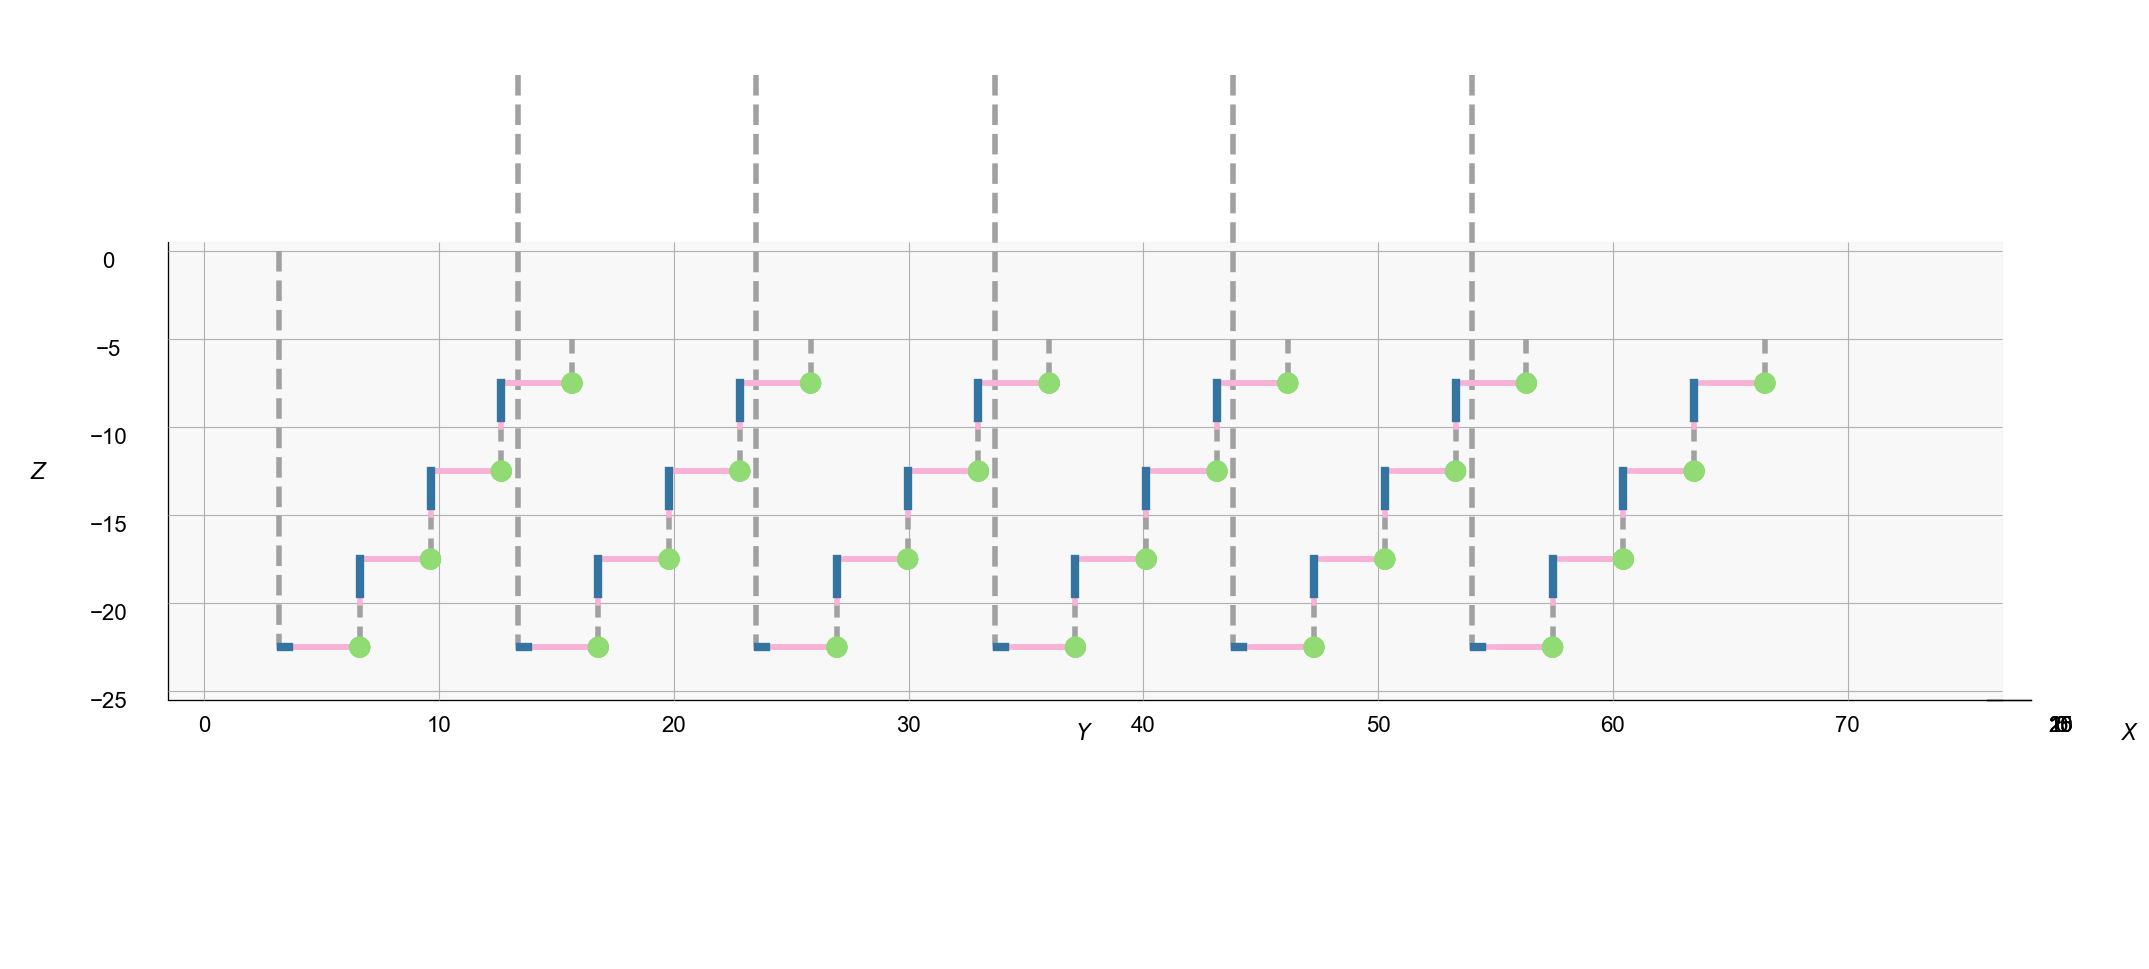

In [10]:
wait3 = 3
x0 = f'&slideW/2+&margin*1.5'
for numLines in [1]:
    for shortdir in ['+y']:
        ylast = 3
        total2 = copy.deepcopy(dv)
        total2 = total2 + sc.startingPoint(0,0,0)
        total2.prime('&dummyFlag1', runFlag1='&runFlag1')
        # head-on, in plane
        for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
            total = copy.deepcopy(dv)
            if i==0 and shortdir=='+y':
                total = total + sc.startingPoint(0,0,0)
            else:
                total = total + sc.startingPoint(di.cp[0], di.cp[1], di.cp[2])

            y00 = f'&margin+{ylast}-{(0.9-0.3)/0.1}*&nid-2*&nid'
            total.j2(x0, y00)
            total2.j2(x0, y00)
            total.prime('&dummyFlag1', runFlag1='&runFlag1')
            total.jz(f'-0.9*&slideW')
            total2.jz(f'-0.9*&slideW')

            for z0frac in [0.9, 0.7, 0.5, 0.3]:
                # write line 1
                
                y0 = f'&nid*16+{ylast}-{(z0frac-0.3)/0.2}*&nid*5'
                z0 = f'-{z0frac}*&slideW'

                di = sc.disturb(flowFlag='&flowFlag1', camFlag='&basFlag1'
                                , writeDir='-x', writeLength='&margin*3'
                                , shiftDir='+y', shiftLength='5*&nid'
                                , distDir=shortdir, distLength=f'&nid*{spacing}' 
                                , initPt=[x0, y0, z0], shiftFrac=0.5, writeExtend=2
                                , wait1=0.25, wait2=0.25, wait3=3, lastPt=total
                                , numLines=numLines, turnOnFrac=0.2, turnOnWait=0)
                di.sbp()
                di.jz(f'-{z0frac-0.1}*&slideW')  # go halfway to next layer
                di.jx(x0)

                total = total + di
                total2 = total2+di
                zz1 = copy.deepcopy(di)
            ylast = di.cp[1]
            ylast = f'{ylast}-&margin/2'
            total.jz(10)
            total2.jz(10)
            total.turnOff('&runFlag1')
            total.export(os.path.join(SBPFOLDER,'singleDisturb',  f'disturbXS2_{numLines}_{shortdir}_{spacing:.3f}.sbp'), [])

        total2.turnOff('&runFlag1')
        total2.mz(10)        
        total2.printVolume()
        total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbXS2_{numLines}_{shortdir}.png'), grids=False)
        total2.plot(ele=0, azi=0, export=False, grids=True)
        # print(total.convertFile('spacing'))

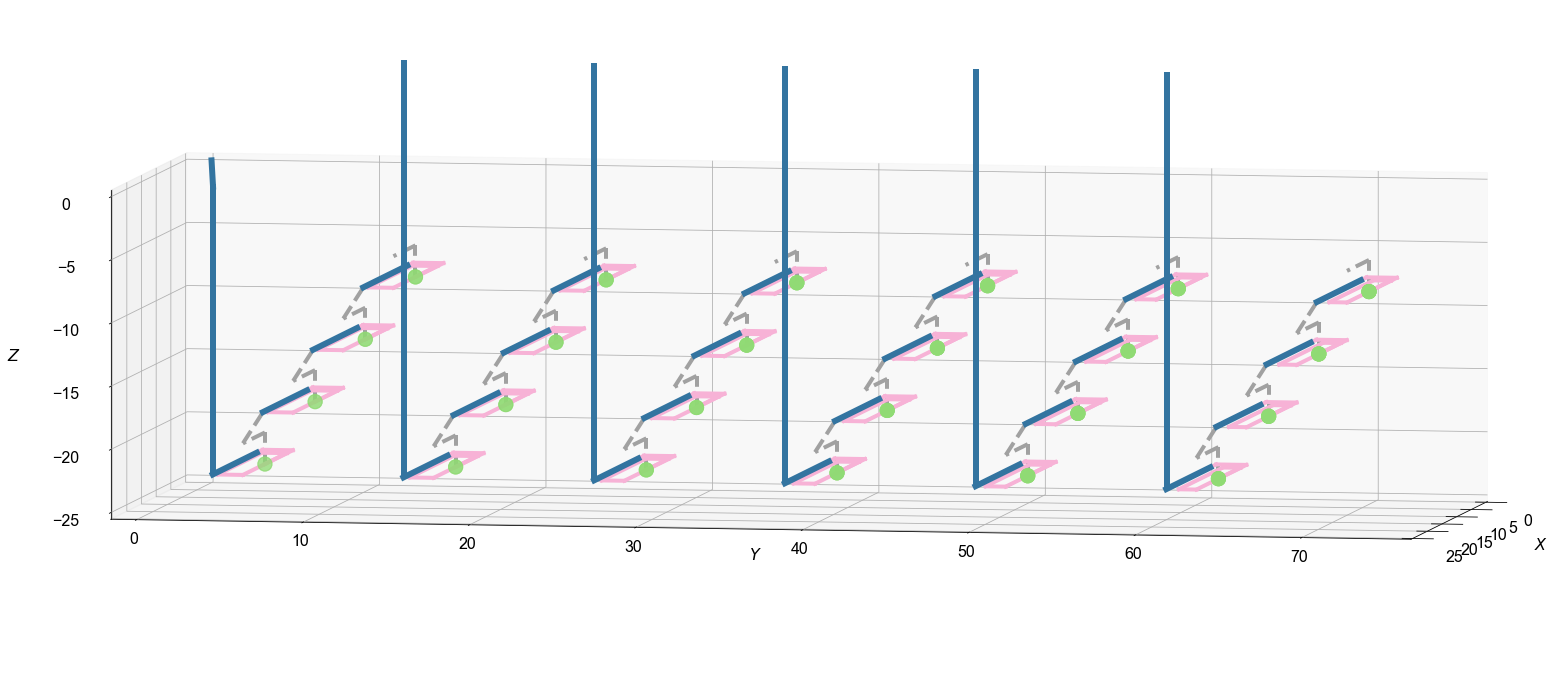

In [54]:
total2.plot(ele=5, azi=10, export=False, grids=True)

##### tripleLinesVert

###### writing

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVert_1.000.sbp

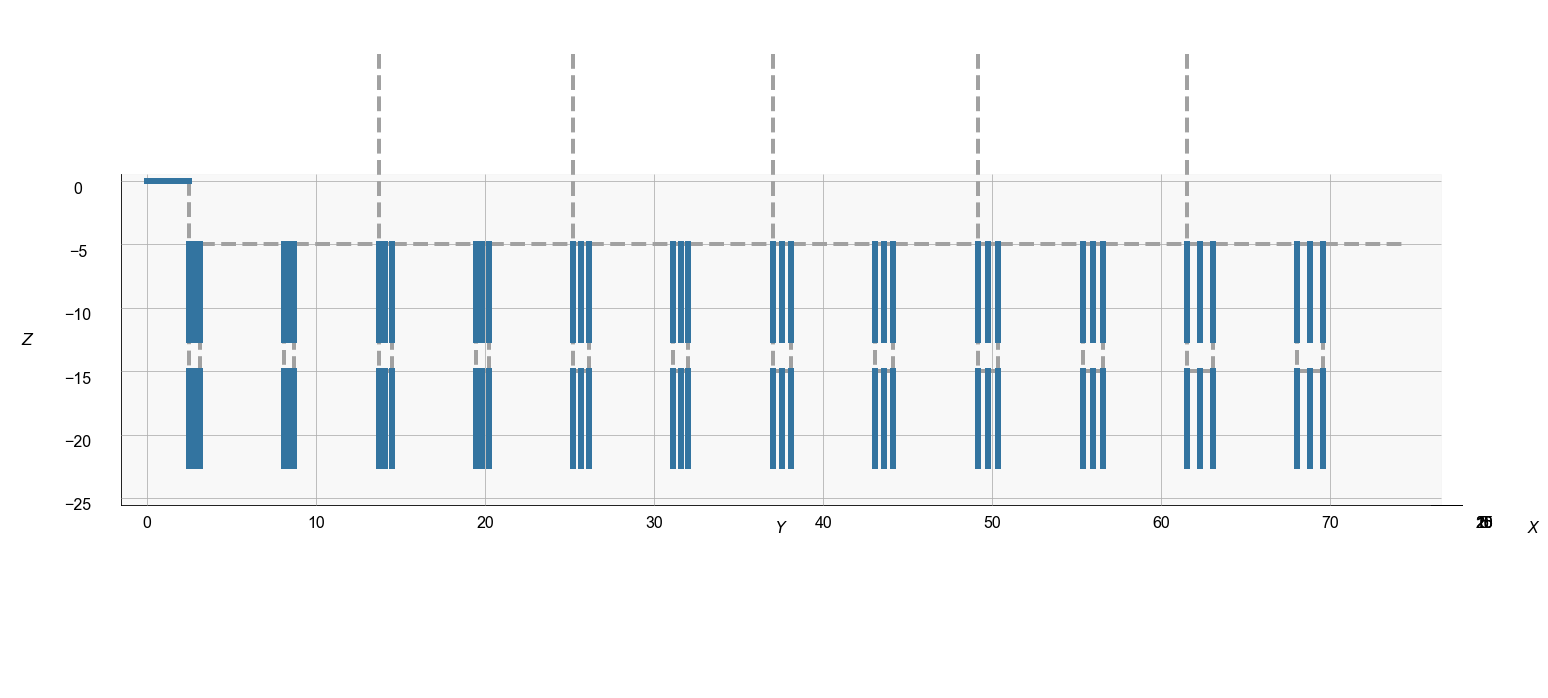

In [4]:
ylast = '&margin/2'
xmed = slideW/2
# head-on, in plane
total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
total2.j2(xmed, ylast)
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.prime(0)
    total.j2(xmed, ylast)
    
    for j in [0,1]:
        # get 4 reps for each spacing
        for z0frac in [0.5,0]:
            v1 = sc.verts(lastPt=total)
            v1.upDownRowReps(direc='+y', p0=f'{ylast}', const=xmed, spacing=f'{spacing}*&nid', reps=3)
            v1.zmax = f'-&slideW*{z0frac}-&margin/2-&margin*{0.5-z0frac}'
            v1.zmin = f'-&slideW*{z0frac+0.5}+&margin/2-&margin*{0.5-z0frac}'
            v1.downdisp = 0
            total = total + v1
            total2 = total2 + v1
   
        ylast = v1.cp[1]
        ylast = sc.p(ylast, '&margin')
        total.jy(ylast)
        total2.jy(ylast) 

    
    total.jz(10)
    
    total2.jz(10)
    total.turnOff(cfg.shopbot.flag1-1)
    total2.turnOff(cfg.shopbot.flag1-1)
    total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'tripleLinesVert_{spacing:.3f}.sbp'), [])
    # print(total.convertFile('spacing'))

total2.turnOff(cfg.shopbot.flag1-1)
total2.mz(10)
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'tripleLinesVert.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

###### pics

0.000 mL, 2 min 57 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVertPics.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesVertPics.csv


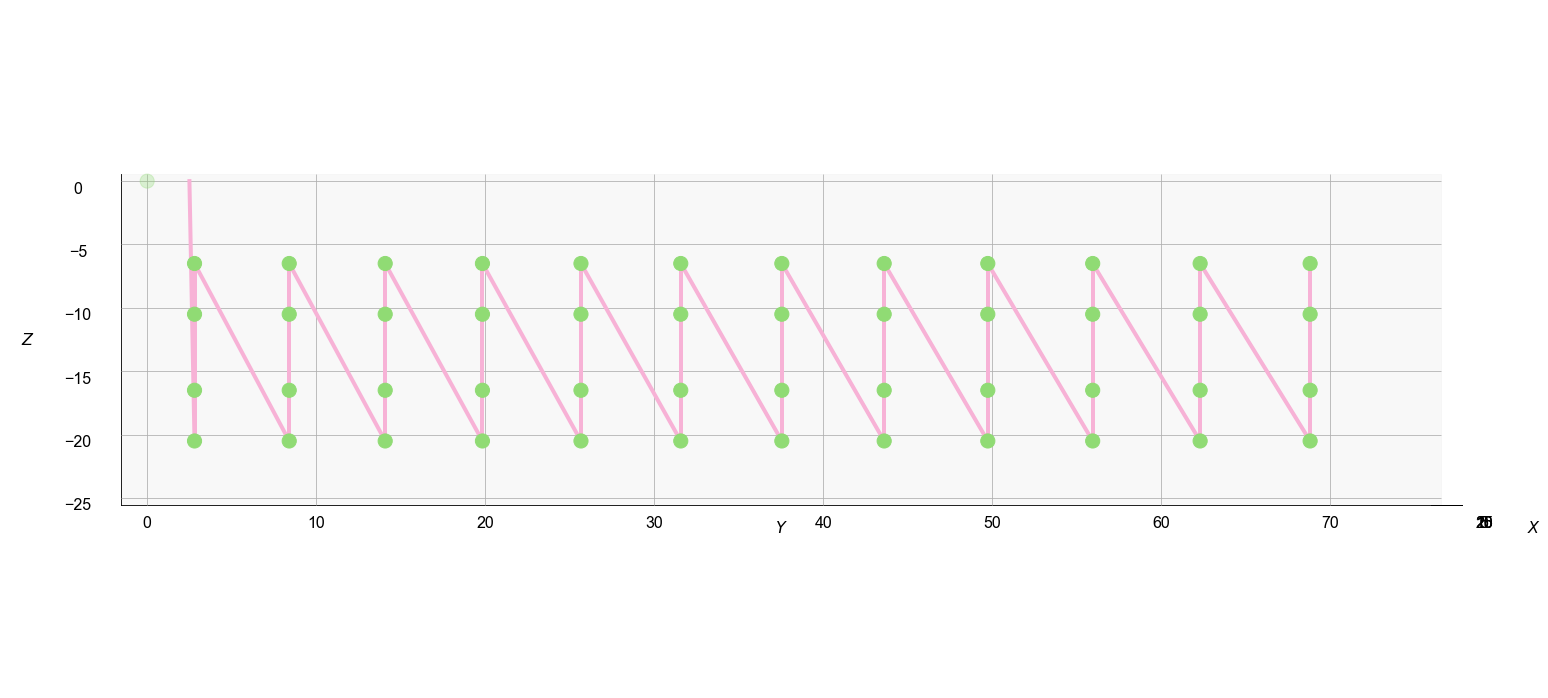

In [10]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(cfg.shopbot.flag1-1)
total.setSpeeds(m=5, j=20)
ylast = '&margin/2'
pic = sc.pics(channel=2, wait=2, lastPt=total)
x = '&slideW/2'
pic.snap()
pic.j2(x, ylast)
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    for j in [0,1]:
        # get 4 reps for each spacing
        y = f'{ylast}+{spacing}*&nid'
        for z0frac in [0.5,0]:
            for dz in [2,6]:
                pic.m3(x,y,f'-&slideW*{z0frac+0.5}+&margin/2+{dz}-&margin*{0.5-z0frac}')
                pic.snap()
        ylast = pic.cp[1]
        ylast = sc.p(ylast, f'&margin+{spacing}*&nid')
total=total+pic

total.turnOff(cfg.shopbot.flag1-1)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  'tripleLinesVertPics.sbp'), [])
# print(total.convertFile('spacing'))

##### disturbVert

###### inline version

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert_1.000.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\Sho

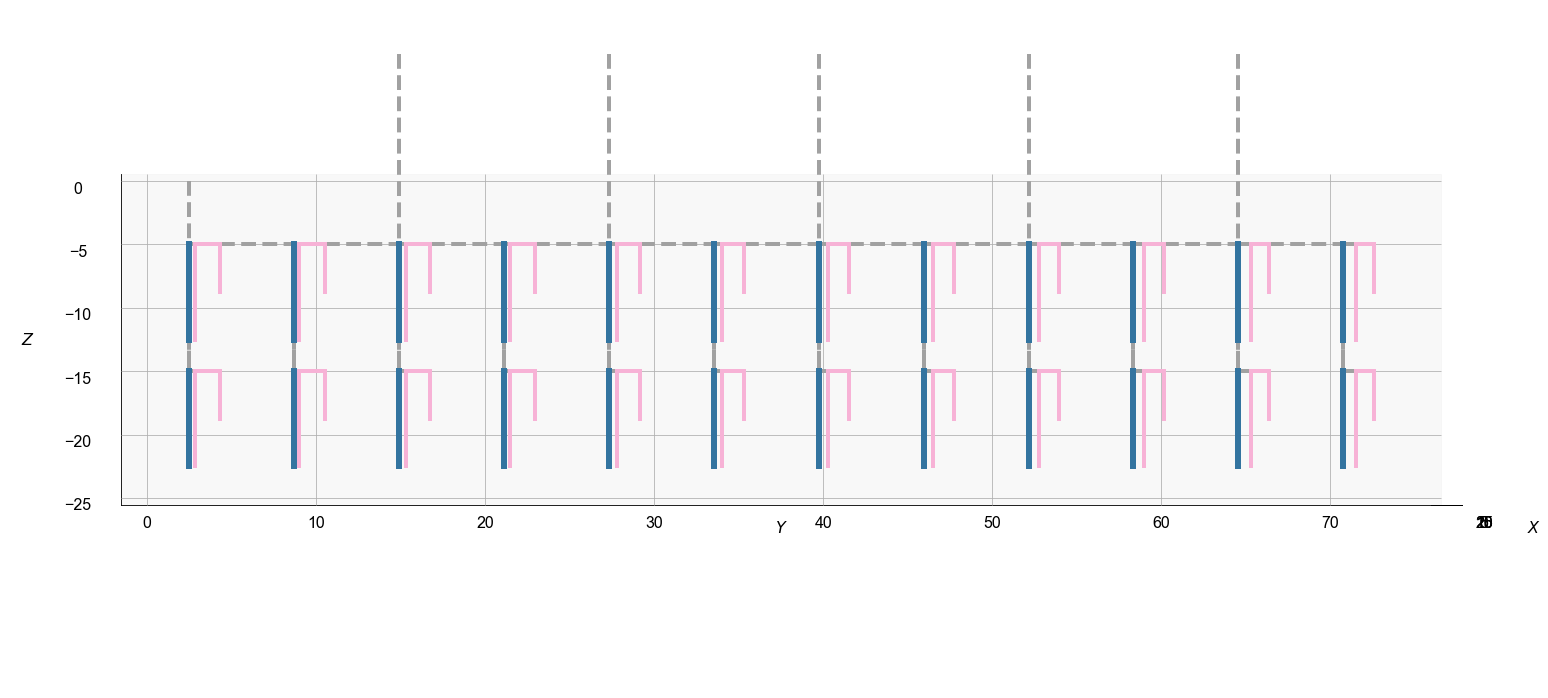

In [15]:
ylast = '&margin/2'
xmed = slideW/2
speed=10
dv.setSpeeds(m=speed, j=20)
# head-on, in plane
total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
total2.j2(xmed, ylast)
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.prime(0)
    total.j2(xmed, ylast)
    

    
    for j in [0,1]:
        # get 4 reps for each spacing
        for z0frac in [0.5,0]:
            v1 = sc.sbpCreator(lastPt=total)
            v1.jy(f'{ylast}')
            z0 = f'-&slideW*{z0frac+0.5}+&margin/2-&margin*{0.5-z0frac}'
            zf = f'-&slideW*{z0frac}-&margin/2-&margin*{0.5-z0frac}'
            
            # write 1st line
            v1.jz(z0)
            v1.turnOn(0)
            v1.mz(zf, pOn=True)
            v1.turnOff(0)
            
            # move to side
            v1.jy(f'{ylast}+3*&nid')
            v1.mz(f'({z0}+{zf})/2')
            v1.pause(1)
            
            # go back to 2nd line
            v1.mz(zf)
            v1.my(f'{ylast}+&nid*{spacing}')
            v1.jz(z0)
            v1.mz(zf)
            
            # move to side
            v1.jy(f'{ylast}+3*&nid')
            v1.mz(f'({z0}+{zf})/2')
            v1.pause(1)
            v1.mz(zf)

            total = total + v1
            total2 = total2 + v1
   
        ylast = sc.p(ylast, '2*&nid+&margin')
        total.jy(ylast)
        total2.jy(ylast) 

    
    total.jz(10)
    
    total2.jz(10)
    total.turnOff(cfg.shopbot.flag1-1)
    total2.turnOff(cfg.shopbot.flag1-1)
    total.export(os.path.join(SBPFOLDER,'singleDisturb',  f'disturbVert_{spacing:.3f}.sbp'), [])
    # print(total.convertFile('spacing'))

total2.turnOff(cfg.shopbot.flag1-1)
total2.mz(10)
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbVert.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

###### shifted, manual

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1.000.sbp
Exported points to C:\Users\lmf1\Documents\G

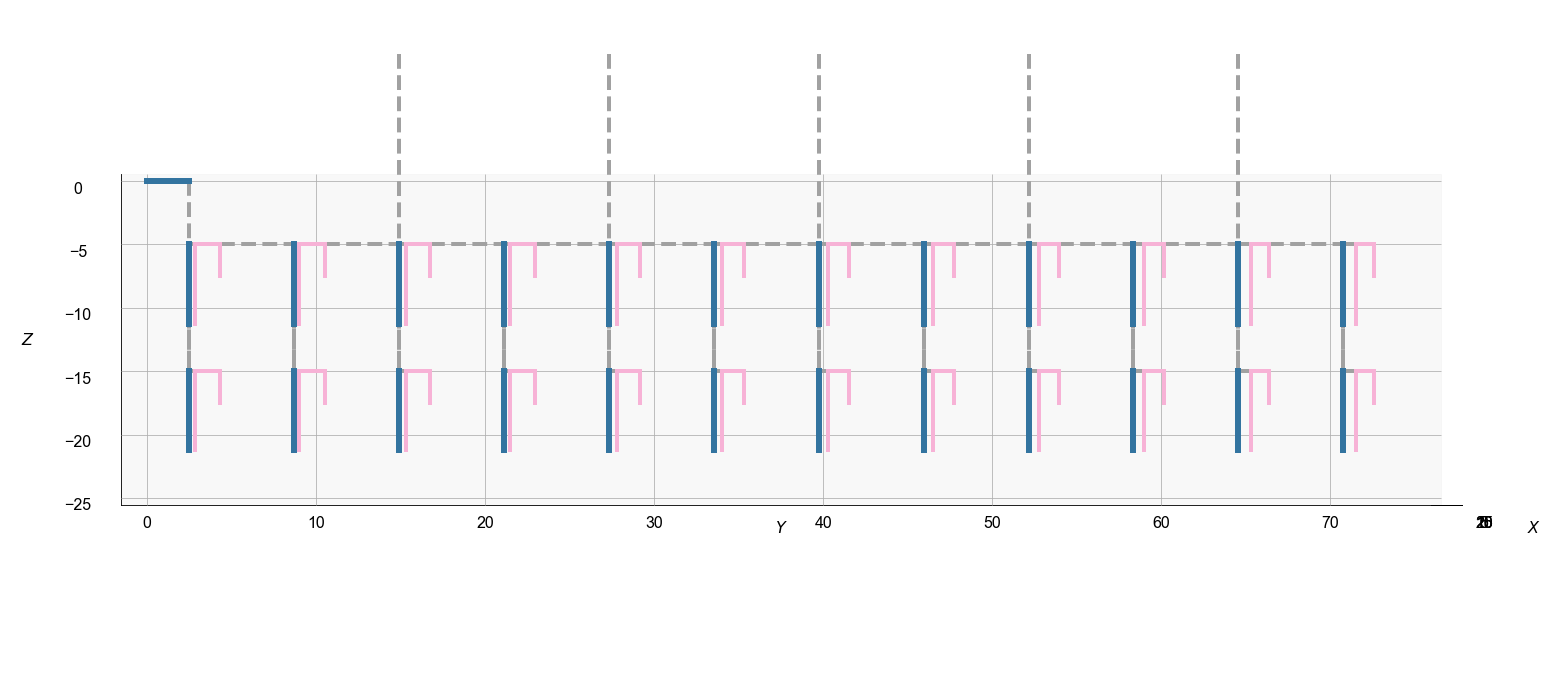

In [59]:
ylast = '&margin/2'
xmed = slideW/2
speed=10
wait3 = 3

# head-on, in plane
total2 = copy.deepcopy(dv)
total2.setSpeeds(m=speed, j=20)
total2.addVar('nid', 0.603)
total2.addVar('wait3', wait3)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
total2.j2(xmed, ylast)
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.setSpeeds(m=speed, j=20)
    total.addVar('nid', 0.603)
    total.addVar('wait3', wait3)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.prime(0)
    total.j2(xmed, ylast)
    
    for j in [0,1]:
        # get 4 reps for each spacing
        for z0frac in [0.5,0]:
            v1 = sc.sbpCreator(lastPt=total)
            v1.jx(f'{xmed}')
            v1.jy(f'{ylast}')
            v1.jx(f'{xmed}+20*&nid*{z0frac-0.25}')
            
            
            z0 = f'-&slideW*{z0frac}+&margin/2-&margin*{0.5-z0frac}-&slideW*0.45'
            zf = f'-&slideW*{z0frac}-&margin/2-&margin*{0.5-z0frac}'
            zmid = f'({z0})*0.4+({zf})*0.6'
            yobserve= f'{ylast}+3*&nid'
            
            # write 1st line
            v1.jz(z0)
            v1.turnOn(0)
            v1.mz(zf, pOn=True)
            v1.turnOff(0)
            
            # move to side
            v1.jy(yobserve)
            v1.mz(zmid)
            v1.pause('&wait3')
            
            # go back to 2nd line
            v1.mz(zf)
            v1.my(f'{ylast}+&nid*{spacing}')
            v1.jz(z0)
            v1.mz(zf)
            
            # move to side
            v1.jy(yobserve)
            v1.mz(zmid)
            v1.pause('&wait3')
            v1.mz(zf)

            total = total + v1
            total2 = total2 + v1
   
        ylast = sc.p(ylast, '2*&nid+&margin')
        total.jy(ylast)
        total2.jy(ylast) 

    
    total.jz(10)
    
    total2.jz(10)
    total.turnOff(cfg.shopbot.flag1-1)
    total2.turnOff(cfg.shopbot.flag1-1)
    total.export(os.path.join(SBPFOLDER,'singleDisturb',  f'disturbVert2_{spacing:.3f}.sbp'), [])
    # print(total.convertFile('spacing'))

total2.turnOff(cfg.shopbot.flag1-1)
total2.mz(10)
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbVert2.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

###### shifted, built-in

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbVert2_1_1.000.sbp
Exported points to C:\User

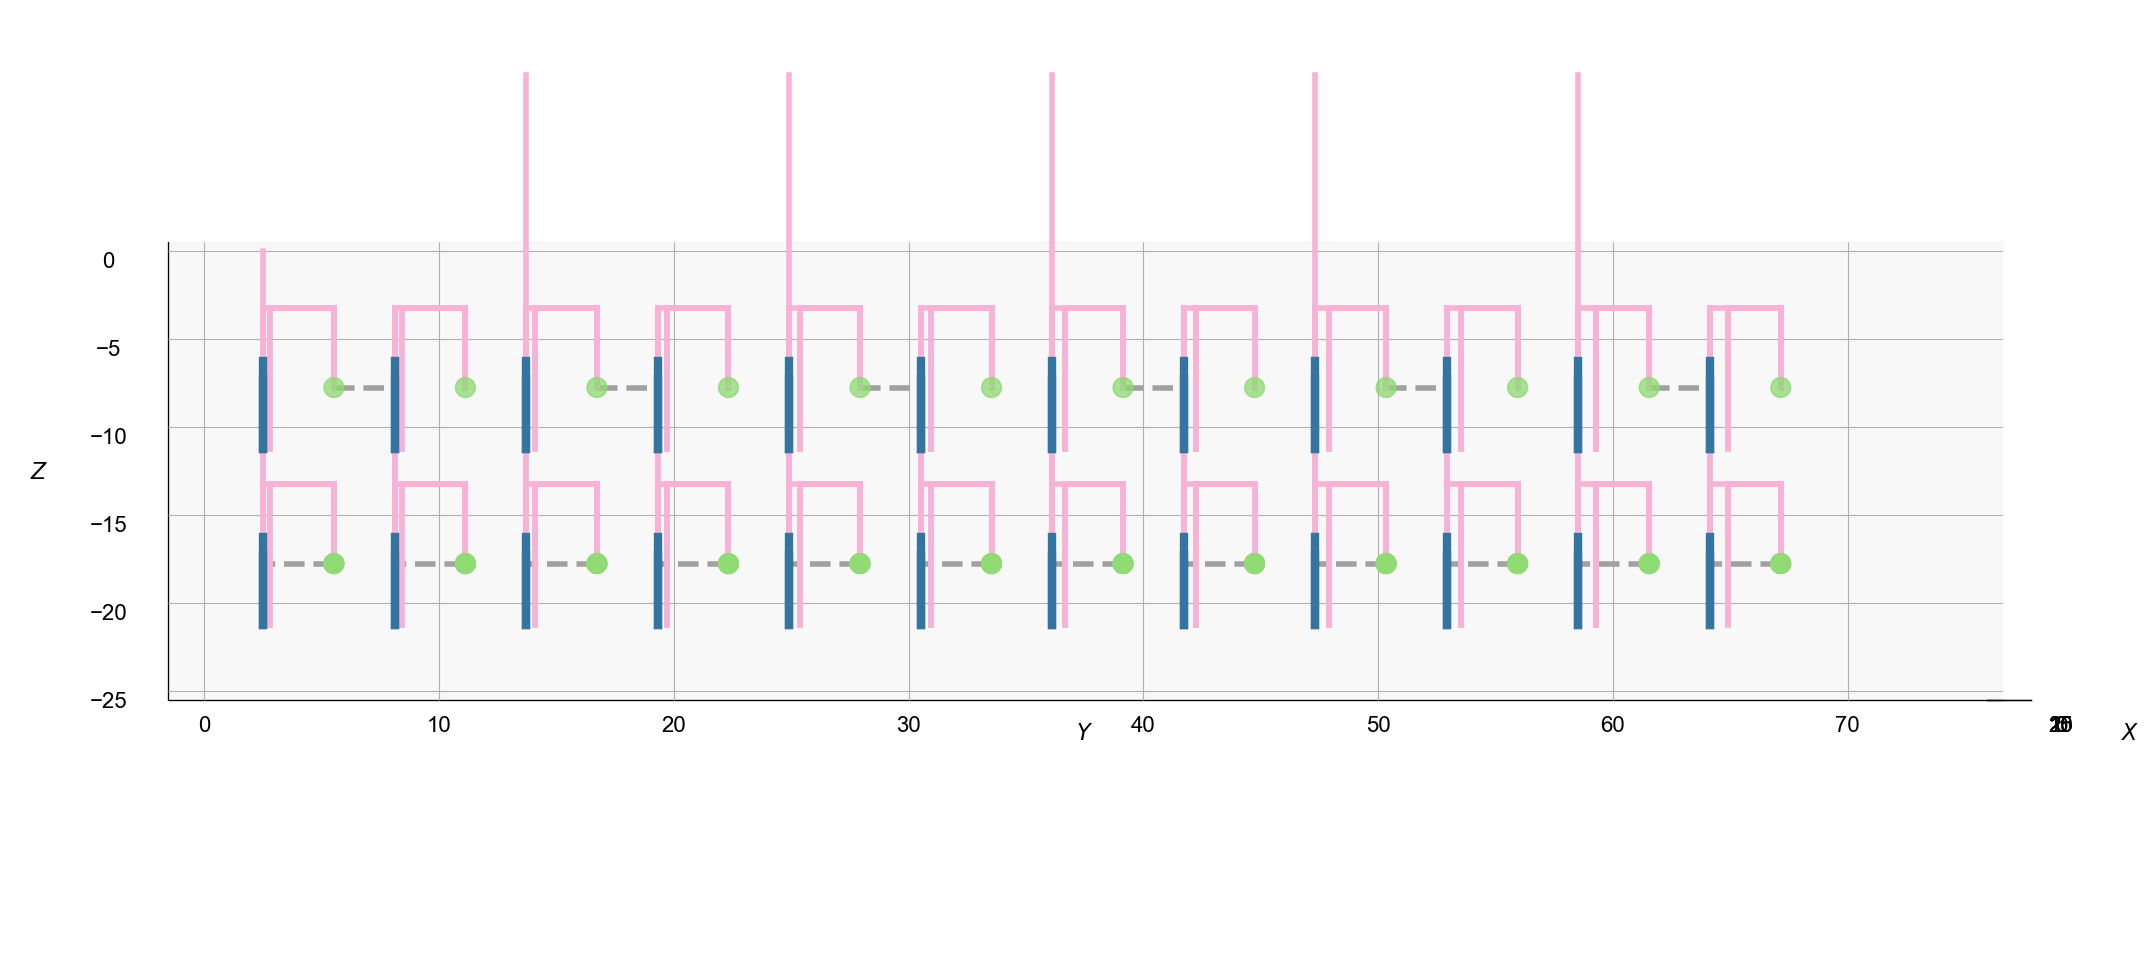

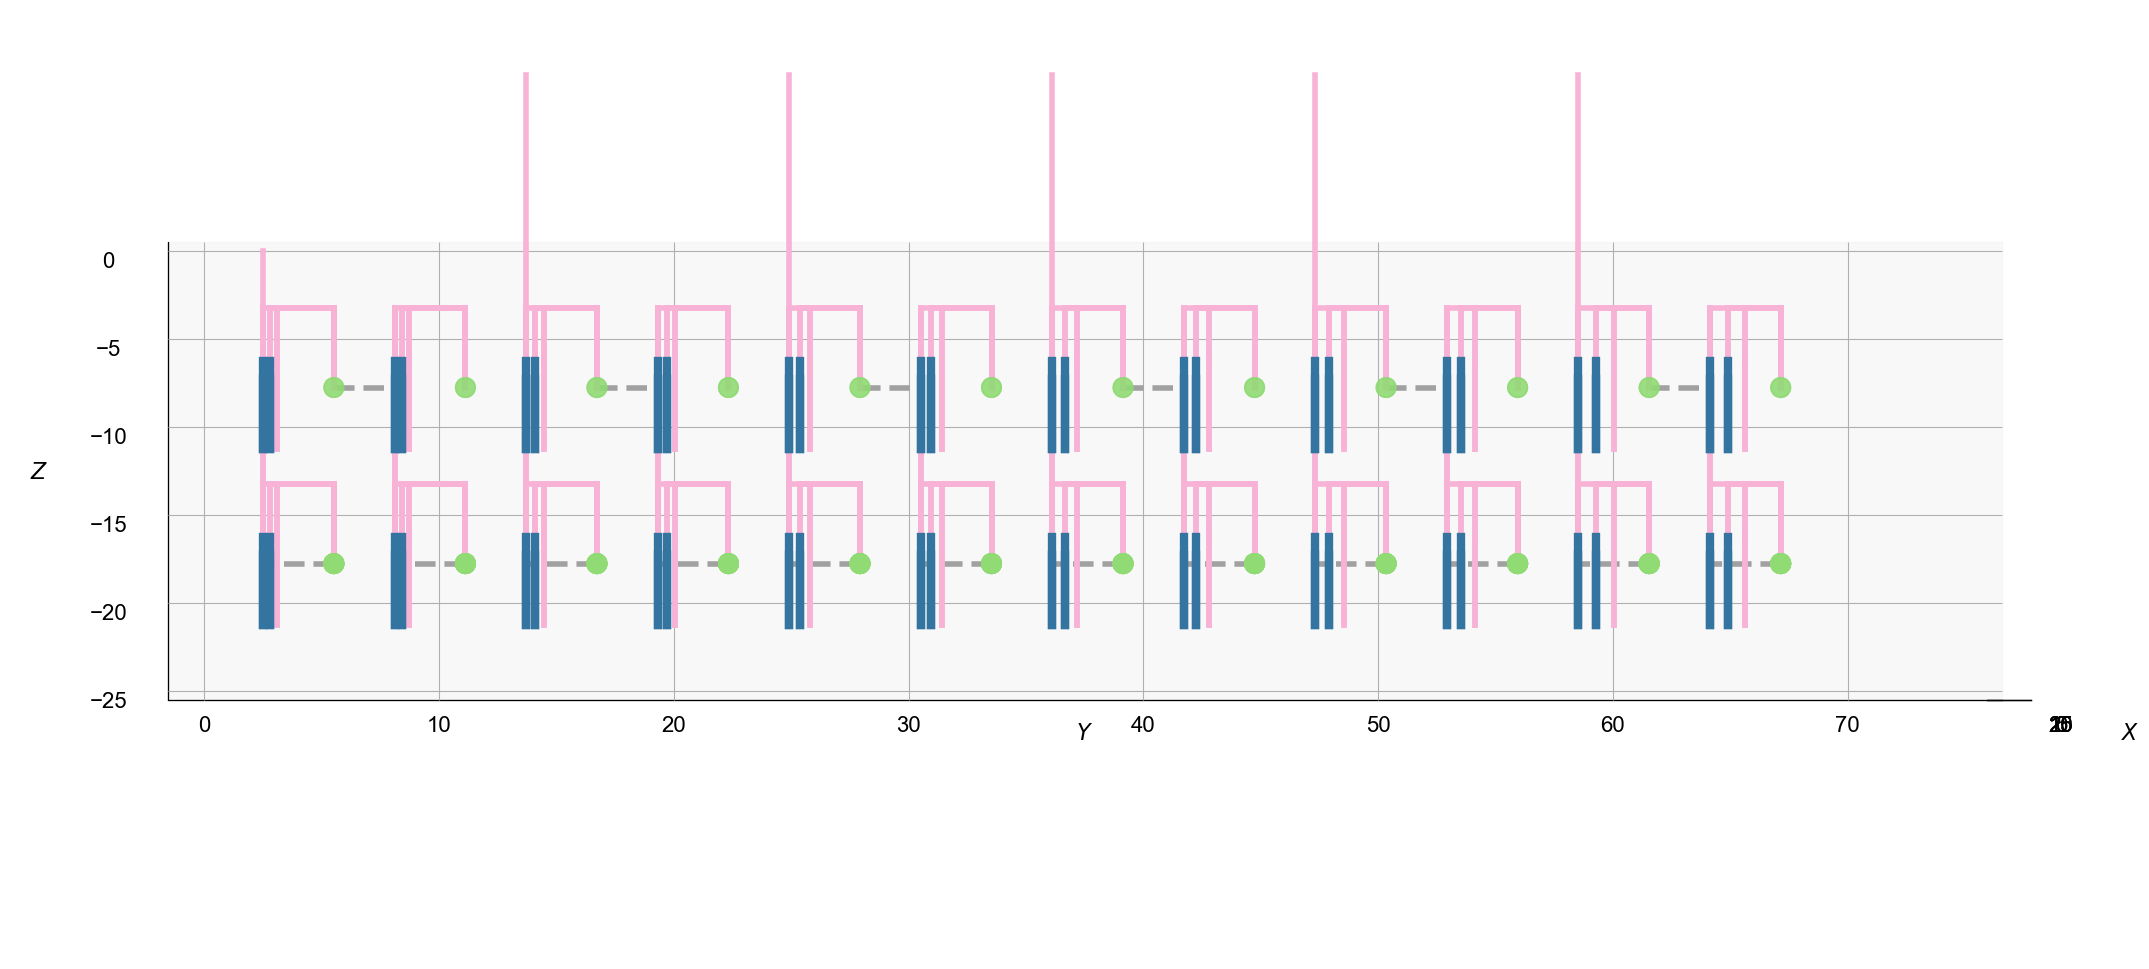

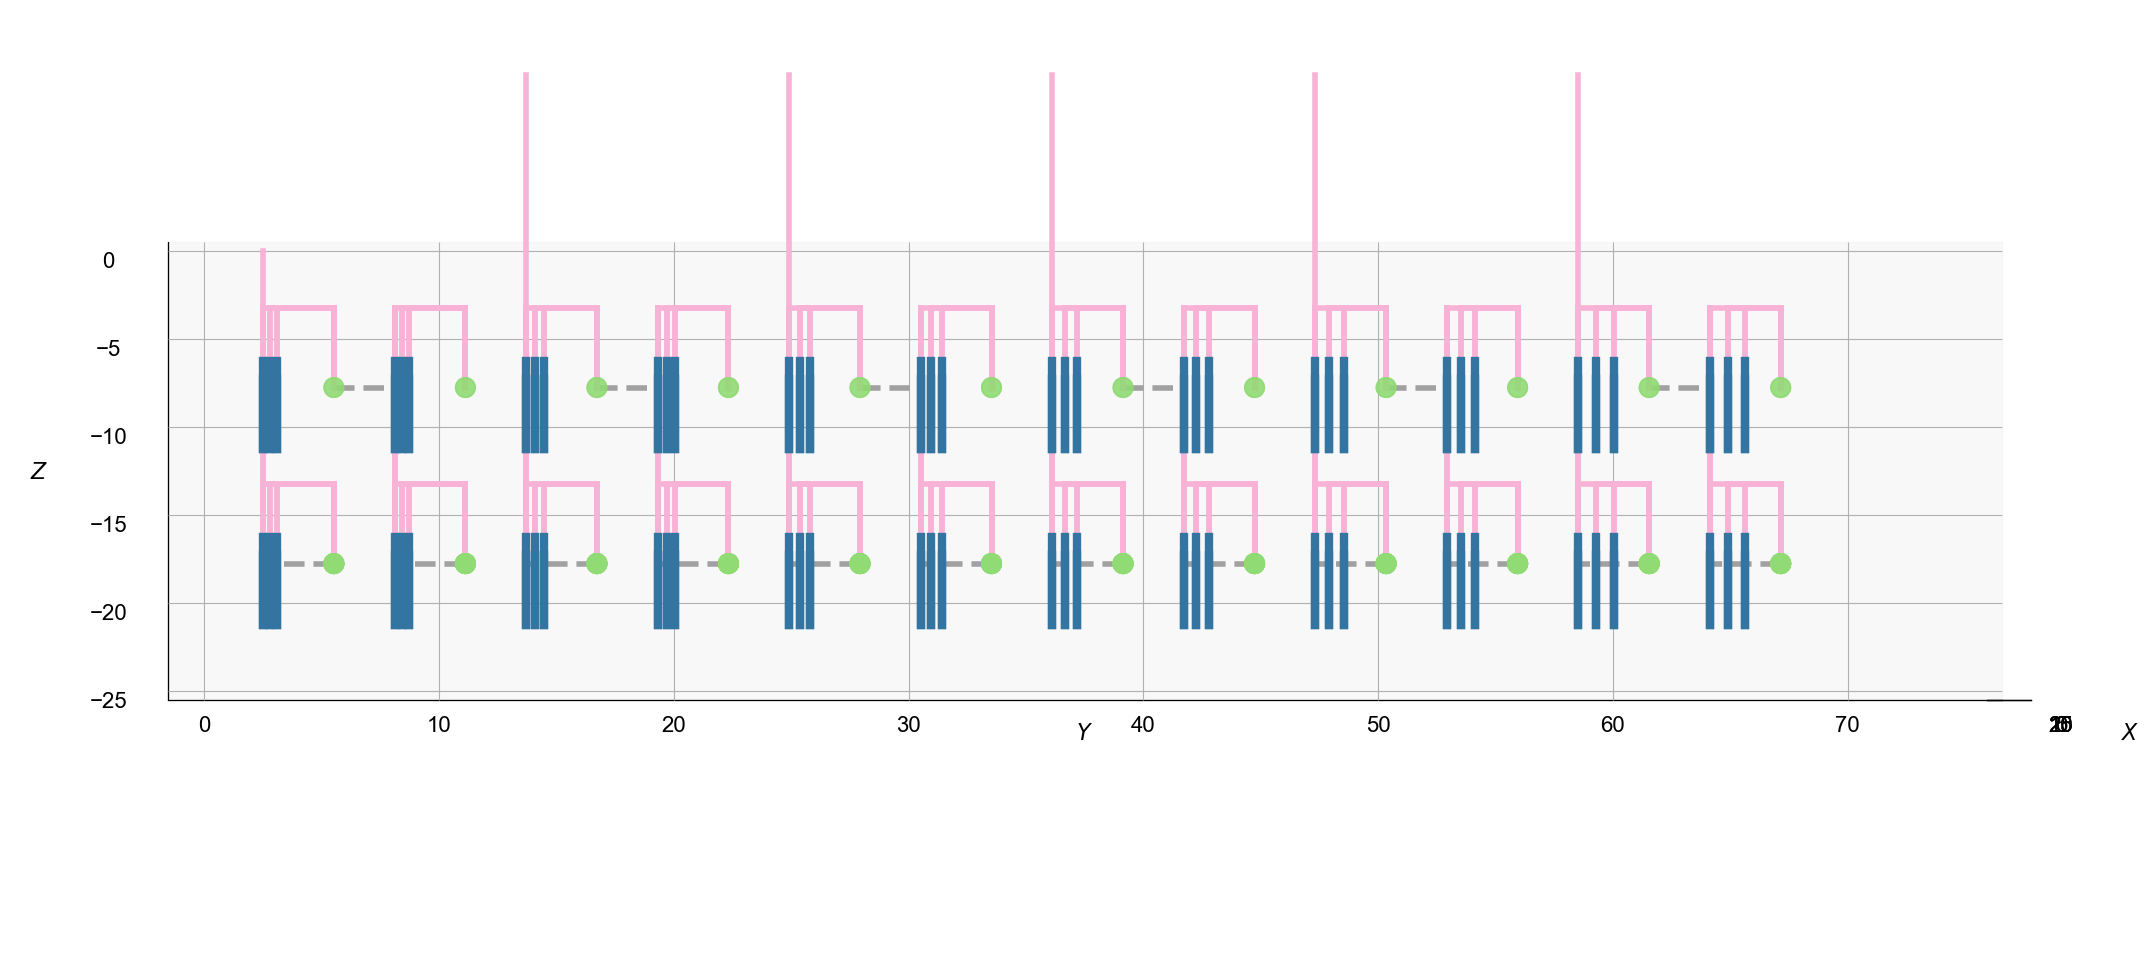

In [34]:
writeLength = 5
for numLines in [1,2,3]:

    ylast = '&margin/2'
    xmed = slideW/2

    # head-on, in plane
    total2 = copy.deepcopy(dv)
    total2 = total2 + sc.startingPoint(0,0,0)
    total2.prime('&dummyFlag1', runFlag1='&runFlag1')
    total2.j2(xmed, ylast)
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.prime('&dummyFlag1', runFlag1='&runFlag1')
        total.j2(xmed, ylast)

        for j in [0, 1]:
            # get 4 reps for each spacing
            for z0frac in [0.5, 0]:

                x0 = f'{xmed}+20*{z0frac-0.25}'
                y0 = ylast
                z0 = f'-&slideW*{z0frac+0.45}-&margin*{-z0frac}'


                di = sc.disturb(flowFlag='&flowFlag1', camFlag='&basFlag1'
                                , writeDir='+z', writeLength=writeLength
                                , shiftDir='+y', shiftLength='5*&nid'
                                , distDir='+y', distLength=f'&nid*{spacing}' 
                                , initPt=[x0, y0, z0], shiftFrac=0.3, writeExtend=3
                                , wait1='&waitDPic', wait2='&waitDSnap', wait3='&waitDO'
                                , lastPt=total, numLines=numLines, turnOnFrac=0.5, turnOnWait=0, turnOffWait=0)
                di.jx(xmed)
                di.jy(ylast)
                di.sbp()

                total = total + di
                total2 = total2+di
                zz1 = copy.deepcopy(di)

            ylast = sc.p(ylast, '&nid+&margin')

        total.jz(10)
        total2.jz(10)
        total.turnOff('&runFlag1')
        total.export(os.path.join(SBPFOLDER,'singleDisturb',  f'disturbVert2_{numLines}_{spacing:.3f}.sbp'), [])
        # print(total.convertFile('spacing'))

    total2.turnOff('&runFlag1')
    total2.mz(10)
    total2.printVolume()
    total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbVert2_{numLines}.png'), grids=False)
    total2.plot(ele=0, azi=0, export=False, grids=True)


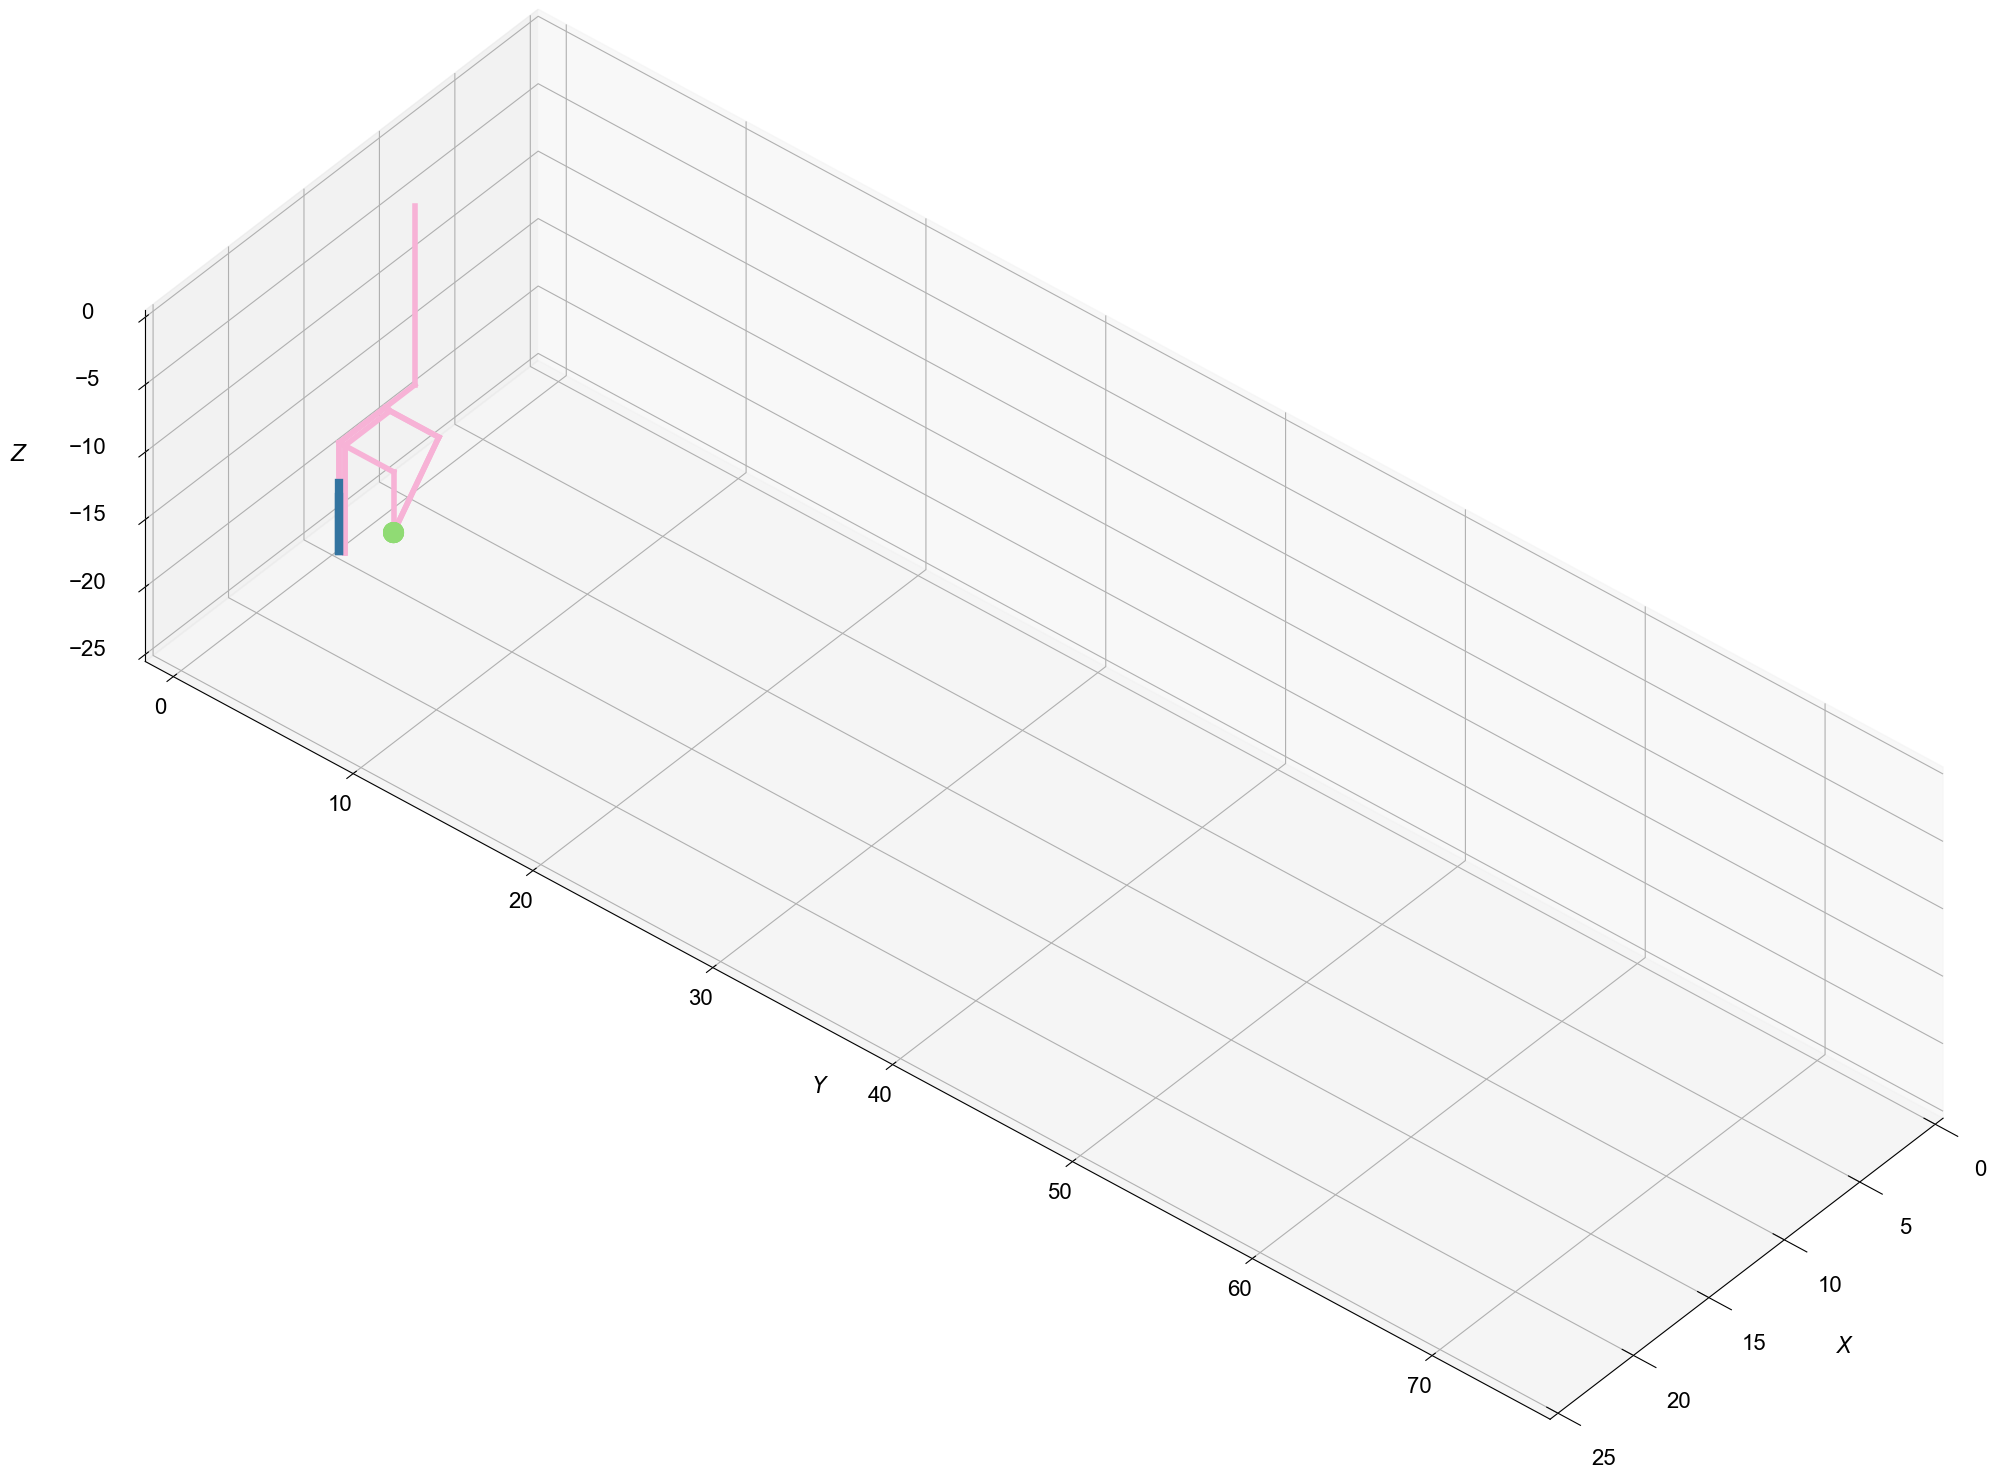

In [24]:
total2.plot(ele=40, azi=40, export=False, grids=True)

##### crossDoubleVert

###### writing 

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLin

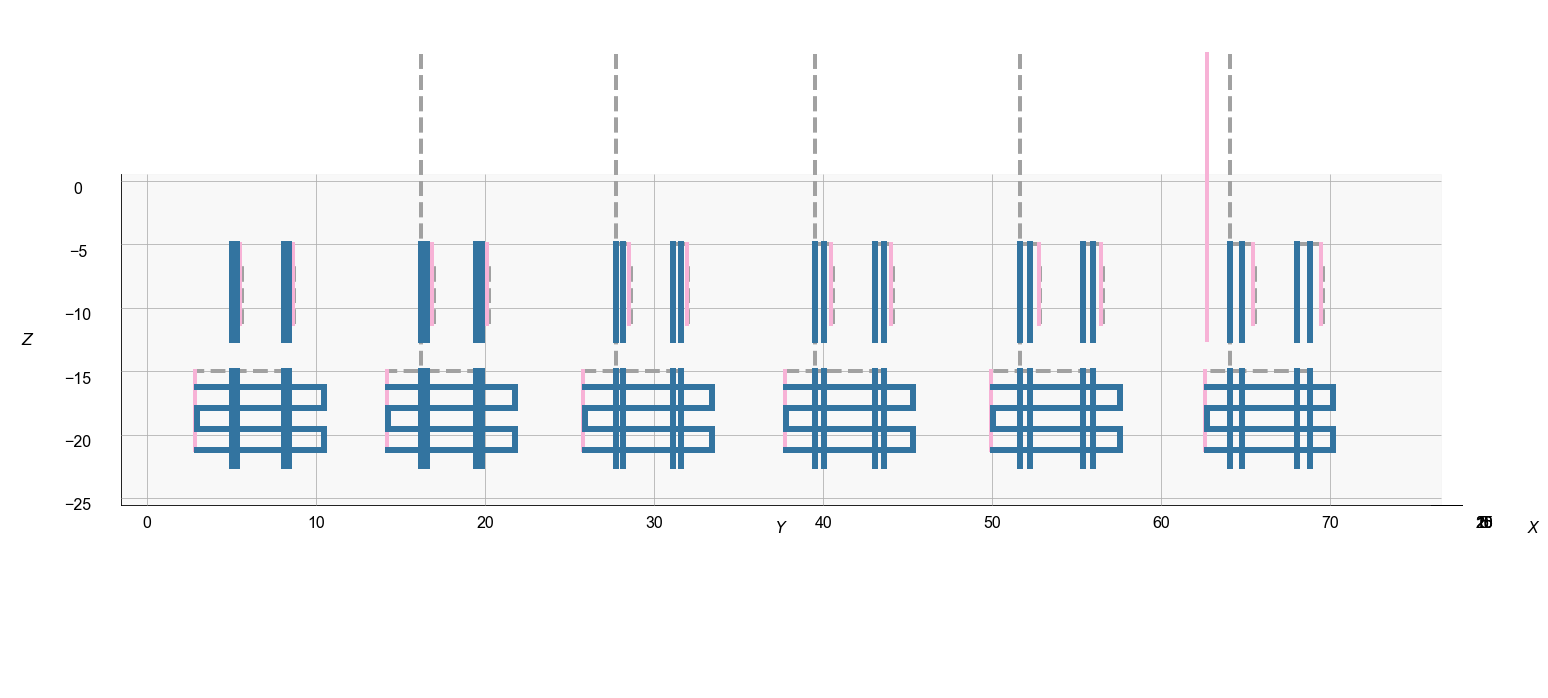

In [6]:
total2 = copy.deepcopy(dv)
total2.addVar('nid',0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)

xmed = slideW/2
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = ['&margin','&margin']
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid',0.603)
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.turnOn(cfg.shopbot.flag1-1)
        total.prime(0)
        
        for j in [0,1]:
            # get 4 reps for each spacing
            v1 = sc.verts(lastPt=total)
            v1.my(f'{ylast[(j+1)%2]}')
            v1.upDownRowReps(direc='+y', p0=f'{ylast[(j+1)%2]}', const=xmed, spacing=f'{spacing}*&nid', reps=2)
            
            if z0frac==0.5:
                v1.zmin = f'-&slideW+&margin/2'
                v1.zmax = f'-&slideW/2-&margin/2'
            else:
                v1.zmin = f'-&slideW/2'
                v1.zmax = f'-&margin'
            v1.downdisp = 0
            total = total + v1
            total2 = total2+v1
            
            ylast[j] = v1.cp[1]
            
            if z0frac==0:
                zz4 = sc.zigzag(lastPt = total, killZigs=True)
                zz4.spacing1 = '&margin/3'
                zz4.spacing2 = '&margin/3'
                zz4.reps=4
                # draw zigzag on each pair
                zz4.width='&margin'
                zz4.x0 = sc.p(xmed, f'-0.5*&margin')
                zz4.z0 = f'{v1.zmin}+&margin/4'
                zz4.longdir = '+x'
                zz4.shortdir = '+z'

                # first pair
                zz4.y0 = sc.p(ylast[j],f'{spacing}*&nid') # place next to double line
                total = total + zz4
                total2 = total2+zz4
            
            if j==0:
                ylast[j] = sc.p(ylast[j], f'&margin/2+{spacing}*&nid')
            else:
                ylast[j] = sc.p(ylast[j], f'&margin*1.5+{spacing}*&nid')
                
        
            
        # draw zigzag
        
        if z0frac==0.5:
            zz4 = sc.zigzag(lastPt = total, killZigs=False)
            zz4.spacing1 = '&margin/3'
            zz4.spacing2 = '&margin/3'
            zz4.reps=4
            zz4.width = '1.5*&margin'
            zz4.x0 = sc.p(xmed, f'-{spacing}*&nid') # place behind double line
            zz4.y0 = f'{ylast[0]}-&margin-{spacing}*&nid/2'
            zz4.z0 = f'{v1.zmin}+&margin/4'
            zz4.longdir = '+y'
            zz4.shortdir = '+z'
            total = total + zz4
            total2 = total2+zz4
            
        
        total.jz(10)
        total2.jz(10)
        total.turnOff(cfg.shopbot.flag1-1)
        total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'crossDoubleVert_{z0frac}_{spacing:.3f}.sbp'), [])
        # print(total.convertFile('spacing'))
        total1 = copy.deepcopy(total)
        
    total.mz(f'-&slideW*{z0frac}')
    total2.mz(f'-&slideW*{z0frac}')

total2.turnOff(cfg.shopbot.flag1-1)
total2.mz(10)
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'crossDoubleVert.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

###### testing

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0.5_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVert_0_0.500.csv
0.056 mL, 0 min 36 s
Exported C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines\crossDoubleVert.png


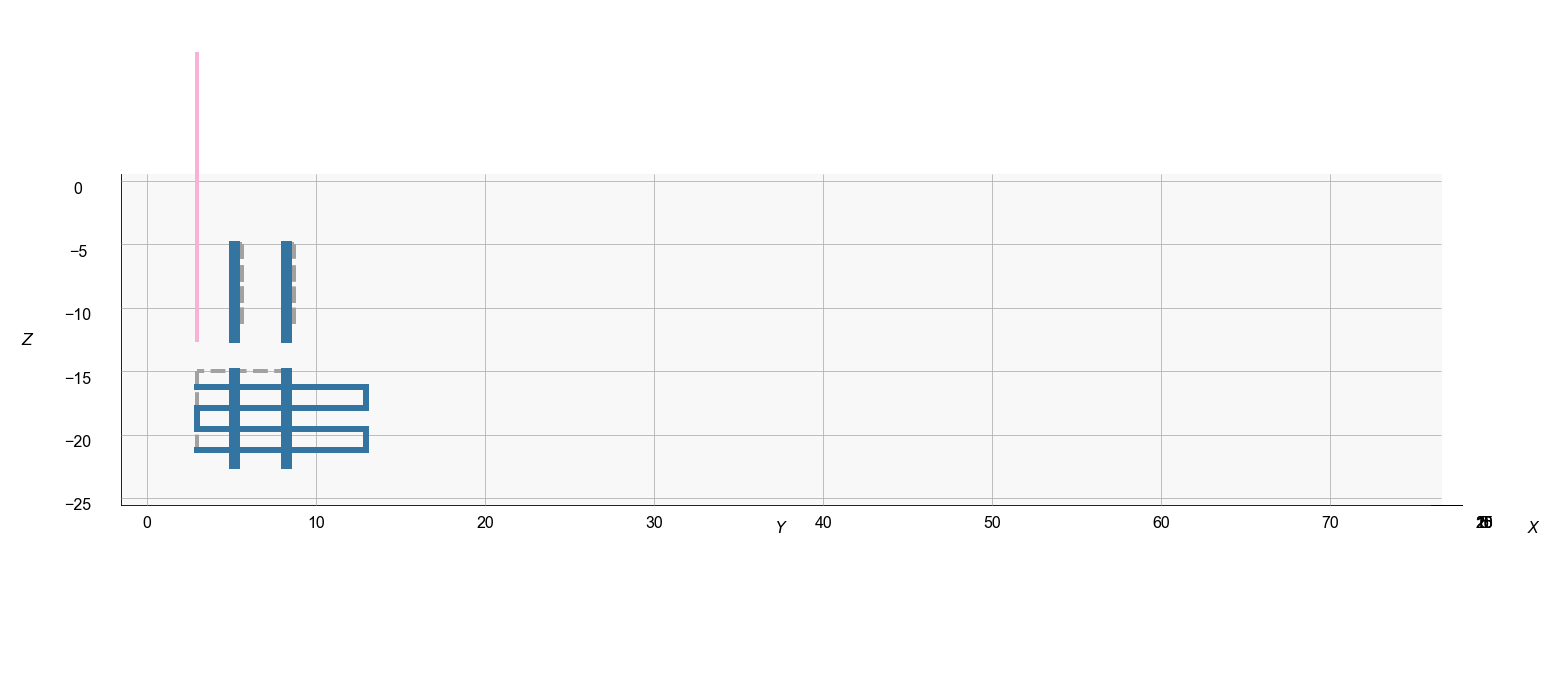

In [57]:
total2 = copy.deepcopy(dv)
total2.addVar('nid',0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
xmed = slideW/2
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = ['&margin','&margin', '&margin']
    for i,spacing in enumerate([0.5]):
        total = copy.deepcopy(dv)

        total.addVar('nid',0.603)
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.prime(1)
        
        for j in [0,1,2]:
            # get 4 reps for each spacing
            v1 = sc.verts(lastPt=total)
            v1.my(f'{ylast[(j+1)%3]}')
            v1.upDownRowReps(direc='+y', p0=f'{ylast[(j+1)%3]}', const=xmed, spacing=f'{spacing}*&nid', reps=2)
            
            if z0frac==0.5:
                v1.zmin = f'-&slideW+&margin/2'
                v1.zmax = f'-&slideW/2-&margin/2'
            else:
                v1.zmin = f'-&slideW/2'
                v1.zmax = f'-&margin'
            v1.downdisp = 0
            total = total + v1
            total2 = total2+v1
            
            ylast[j] = v1.cp[1]
            
            if z0frac==0:
                zz4 = sc.zigzag(lastPt = total, killZigs=True)
                zz4.spacing1 = '&margin/3'
                zz4.spacing2 = '&margin/3'
                zz4.reps=4
                # draw zigzag on each pair
                zz4.width='&margin'
                zz4.x0 = sc.p(xmed, f'-0.25*&margin')
                zz4.z0 = f'{v1.zmin}+&margin/4'
                zz4.longdir = '+x'
                zz4.shortdir = '+z'

                # first pair
                zz4.y0 = sc.p(ylast[j],f'{spacing}*&nid') # place next to double line
                total = total + zz4
                total2 = total2+zz4
            
            if j==0:
                ylast[j] = sc.p(ylast[j], f'&margin/2+{spacing}*&nid')
            elif j==1:
                ylast[j] = sc.p(ylast[j], f'&margin*1.5+{spacing}*&nid')
            elif j==2:
                ylast[j] = sc.p(ylast[j], f'&margin*2.5+{spacing}*&nid')
        
            
        # draw zigzag
        
        if z0frac==0.5:
            zz4 = sc.zigzag(lastPt = total, killZigs=False)
            zz4.spacing1 = '&margin/3'
            zz4.spacing2 = '&margin/3'
            zz4.reps=4
            zz4.width = '2*&margin'
            zz4.x0 = sc.p(xmed, f'-{spacing}*&nid') # place behind double line
            zz4.y0 = f'{ylast[0]}-&margin-{spacing}*&nid/2'
            zz4.z0 = f'{v1.zmin}+&margin/4'
            zz4.longdir = '+y'
            zz4.shortdir = '+z'
            total = total + zz4
            total2 = total2+zz4
            
        
        total.jz(10)
        total2.jz(10)
        total.turnOff(cfg.shopbot.flag1-1)
        total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'crossDoubleVert_{z0frac}_{spacing:.3f}.sbp'), [])
        # print(total.convertFile('spacing'))
        total1 = copy.deepcopy(total)
        
    total.mz(f'-&slideW*{z0frac}')
    total2.mz(f'-&slideW*{z0frac}')

total2.turnOff(cfg.shopbot.flag1-1)
total2.mz(10)
total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'crossDoubleVert.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

###### pics

0.000 mL, 1 min 46 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVertPics2.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleVertPics2.csv


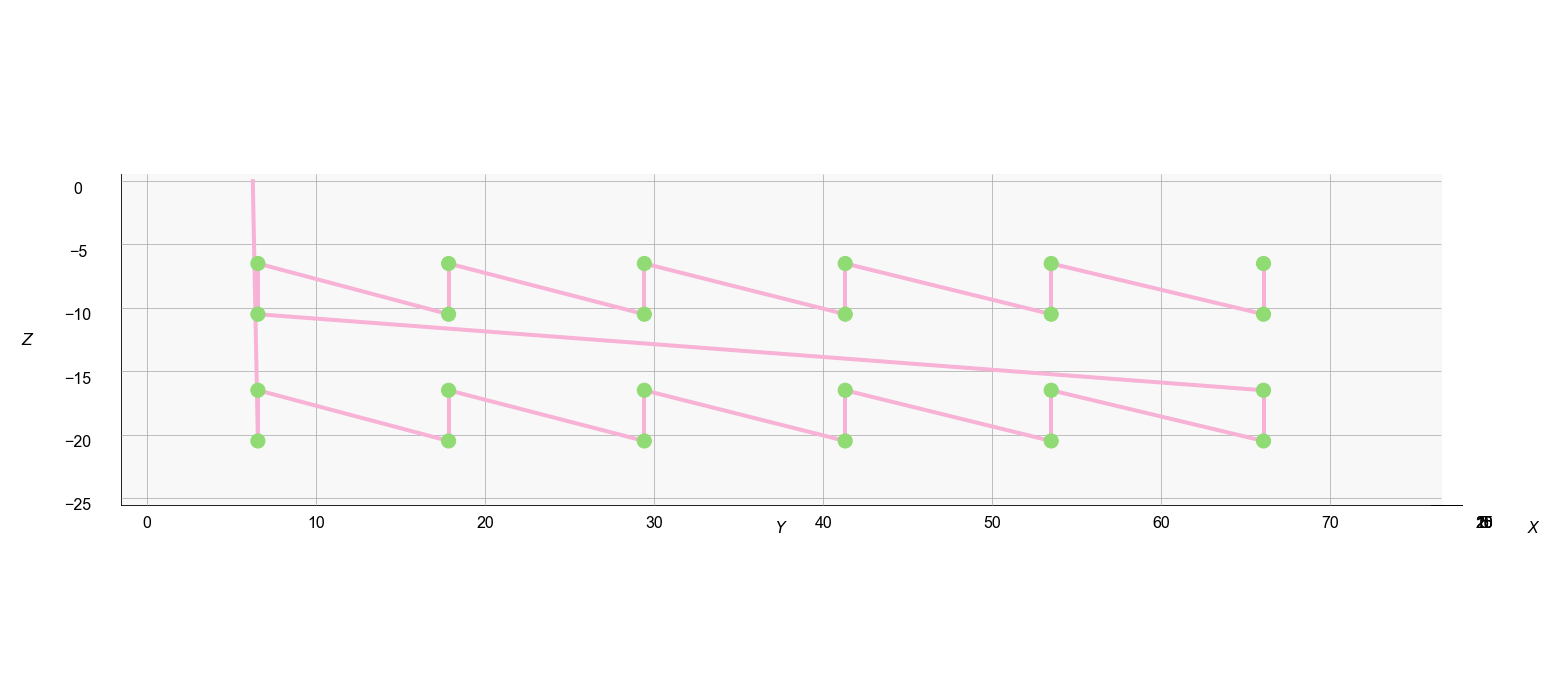

In [9]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(cfg.shopbot.flag1-1)
total.setSpeeds(m=5, j=20)

pic = sc.pics(channel=cfg.camera.cam0.flag1-1, wait=2, lastPt=total)
x = '&slideW/2'
pic.j2(x,'1.25*&margin')
# head-on, in plane
for z0frac in [0.5,0]:
    ylast = '1.25*&margin'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        for j in [0.5]:
            # get 4 reps for each spacing
            y = f'{ylast}+{spacing}*&nid'
            for k in [2,6]:
                if z0frac==0.5:
                    pic.m3(x,y,f'-&slideW*{z0frac+0.5}+&margin/2+{k}')
                else:
                    pic.m3(x,y,f'-&slideW*{z0frac+0.5}+{k}')
                pic.snap()
            ylast = f'{ylast}+2*&margin+4*{spacing}*&nid'
            
total=total+pic

total.turnOff(cfg.shopbot.flag1-1)
total.withdraw()
total.printVolume()
total.export(os.path.join(SBPFOLDER, 'tripleLinesSide', 'crossDoubleVertPics2.sbp'), [])
total.plot(ele=0, azi=0, export=False, grids=True)
# print(total.convertFile('spacing'))

##### crossDoubleHoriz

###### writing

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHoriz_0.5_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHoriz_0.5_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHoriz_0.5_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHoriz_0.5_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHoriz_0.5_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHoriz_0.5_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHoriz_0.5_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHoriz_0.5_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\t

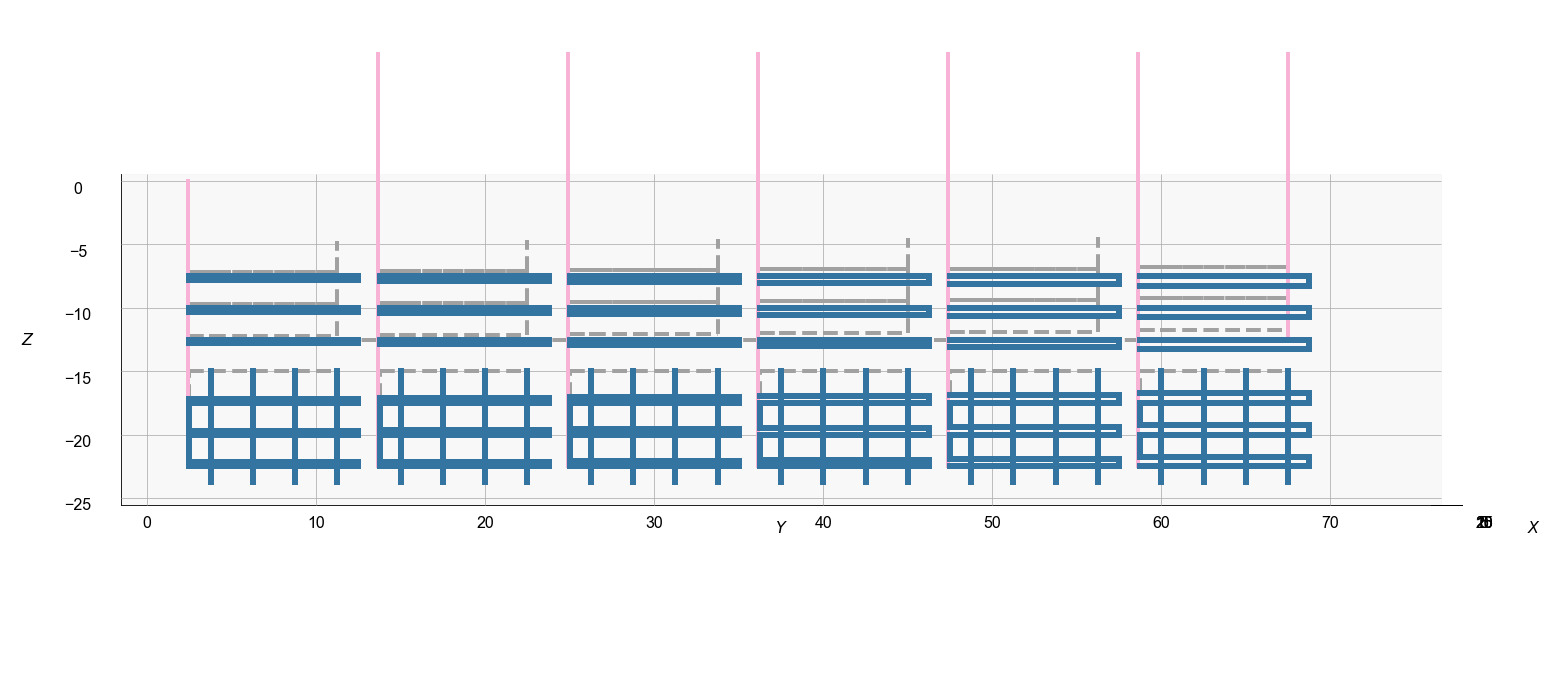

In [15]:
total2 = copy.deepcopy(dv)
total2.addVar('nid',0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
xmed = slideW/2
# head-on, in plane
for z0frac in [0.5,0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid',0.603)
        
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.prime(0)
        if z0frac==0.5:
            # bottom: double zigzag, then verts
            zz4 = sc.zigzag(lastPt = total, killZigs=False)
            zz4.spacing2 = f'{spacing}*&nid'
            zz4.spacing1 = f'&margin/2-{spacing}*&nid'
            zz4.width='2*&margin'
            zz4.x0 = xmed
            zz4.longdir = '+y'
            zz4.shortdir = '+z'
            zz4.y0 = ylast
            zz4.reps=6
            zz4.z0 = f'-&slideW*(0.5+{z0frac})+&margin/2'
            total = total + zz4
            total2 = total2 + zz4
        else:
            for k in range(3):
                zz4 = sc.zigzag(lastPt = total, killZigs=False)
                zz4.spacing2 = f'{spacing}*&nid'
                zz4.spacing1 = f'&margin/2-{spacing}*&nid'
                zz4.width='2*&margin'
                zz4.x0 = xmed
                zz4.longdir = '+y'
                zz4.shortdir = '+z'
                zz4.y0 = ylast
                zz4.reps = 2
                zz4.z0 = sc.p(sc.p(f'-&slideW*(0.5+{z0frac})', sc.t(k, zz4.spacing1)), sc.t((k-1), zz4.spacing2))
                total = total+zz4
                total2 = total2+zz4
                # zag across
                zz = sc.zigzag(lastPt=total, killZigs=True)
                zz.x0 = f'{xmed}-&margin*0.3'
                zz.y0 = f'{zz4.cp[1]}+&margin/4'
                zz.z0 = f'{zz4.cp[2]}+{spacing}*&nid'
                zz.width='&margin*0.6'
                zz.spacing1 = f'&margin/2'
                zz.spacing2 = f'&margin/2'
                zz.reps=4
                zz.jz(zz.z0)
                zz.shortdir = '+y'
                zz.longdir='+x'
                zz.sbp()
                zz.jz(sc.p(zz.z0,'&margin/2'))
                total = total + zz
                total2 = total2+zz
                
            
        # draw zigzag on each pair
    
        ylast = sc.p(zz4.cp[1],'&margin*2.25')
        if z0frac==0.5:
            v1 = sc.verts(lastPt=total)
            v1.upDownRowReps(direc='+y', p0=sc.p('&margin/4', zz4.cp[1]), const=sc.p(xmed, f'-{spacing}*&nid'), spacing='&margin/2', reps=4)
            v1.zmax = f'-&slideW*{z0frac}-&margin/2'
            v1.zmin = f'-&slideW*{z0frac+0.5}+&margin/4'
            v1.downdisp = 0
            total = total + v1
            total2 = total2+v1
            
        total.jz(10)
        total2.jz(10)
        total2.turnOff(cfg.shopbot.flag1-1)
        total.turnOff(cfg.shopbot.flag1-1)
        total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  f'crossDoubleHoriz_{z0frac}_{spacing:.3f}.sbp'), [])
        
    total.mz(f'-&slideW*{z0frac}')
    total2.mz(f'-&slideW*{z0frac}')

total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'crossDoubleHoriz.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)
# print(total.convertFile('spacing'))

###### pics

0.000 mL, 1 min 46 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHorizPics2.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\crossDoubleHorizPics2.csv


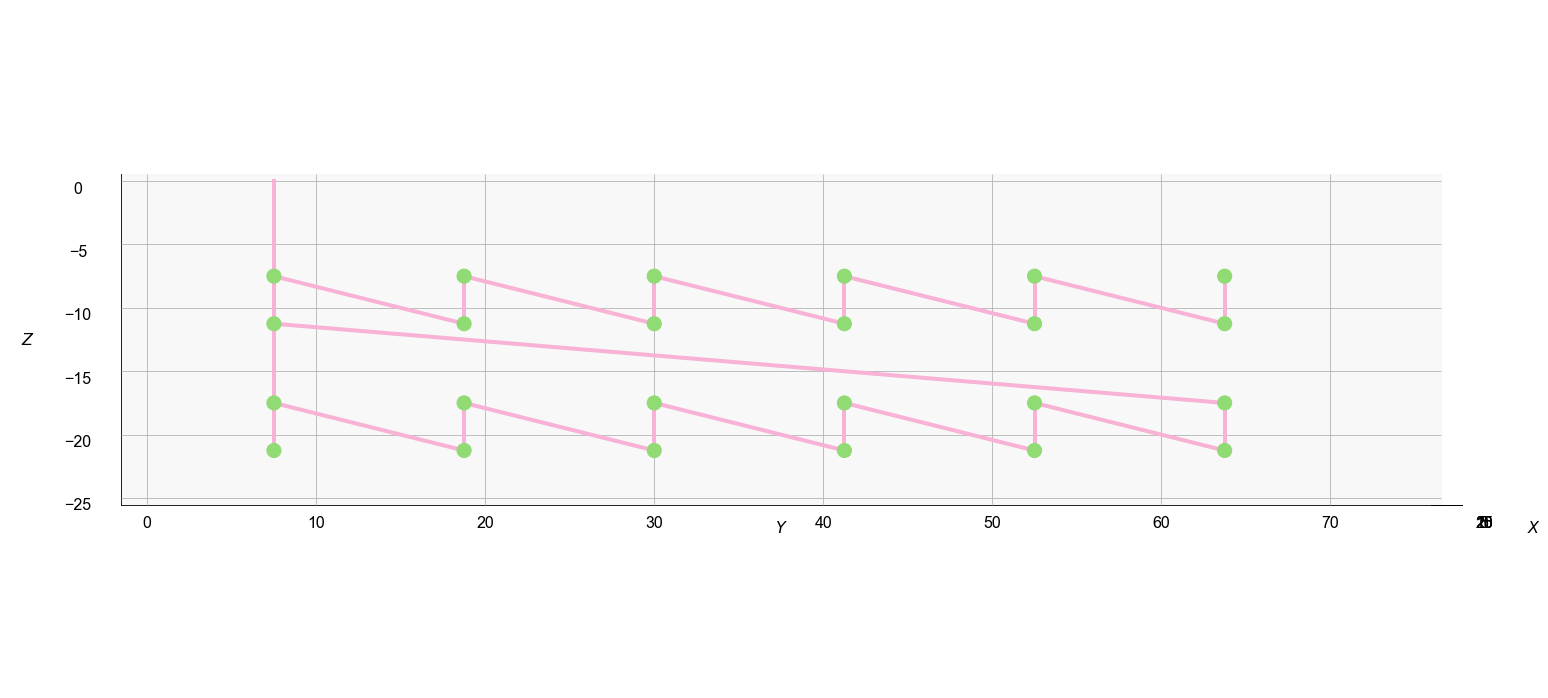

In [12]:
total = copy.deepcopy(dv)
total.setSpeeds(m=5, j=20)
total = total + sc.startingPoint(0,0,0)
total.turnOn(cfg.shopbot.flag1-1)

xmed = slideW/2
pic = sc.pics(channel=2, wait=2, lastPt=total)
x = '&slideW/2'
y= '&margin*1.5'
pic.m2(x,y)
# pic.mx('&slideW/2')
# pic.snap()
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        for k in [0.5,2]:
            for j in [1.5]:
                y = sc.p(ylast,f'&margin/2*{j}+&margin/4')
            if z0frac==0.5:
                pic.m3(x,y,f'-&slideW+&margin/2+{k}*&margin/2')
            else:
                pic.m3(x,y,f'-&slideW*0.5+{k}*&margin/2')
            pic.snap()
        ylast = sc.p(pic.cp[1],'&margin*1.25')

total = total+pic
total.turnOff(cfg.shopbot.flag1-1)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER,'tripleLinesSide',  'crossDoubleHorizPics2.sbp'), [])
# print(total.convertFile('spacing'))

##### tripleLinesHoriz

###### writing

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHoriz_

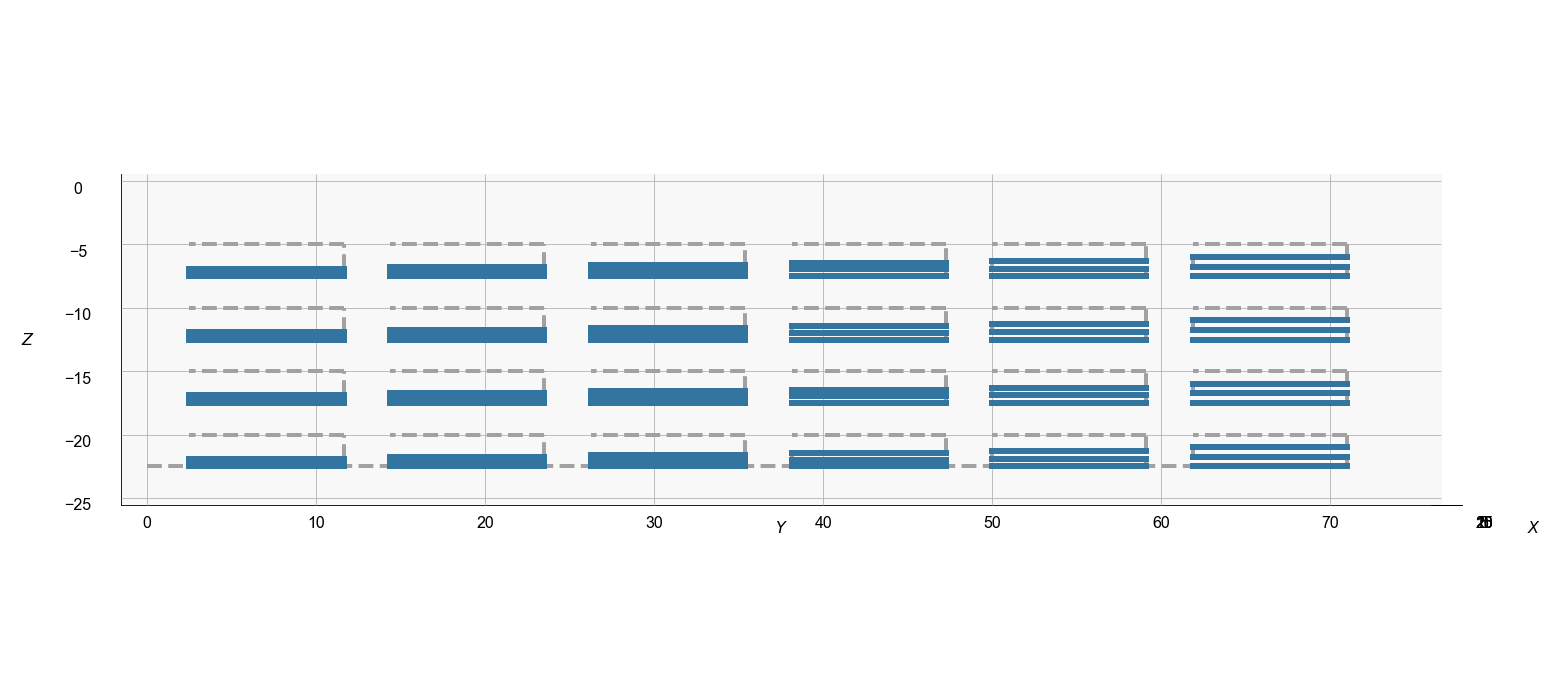

In [8]:
ylast = '&margin/2'

total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
total2.mx('&slideW/2')
    
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.prime(0)

    total.mx('&slideW/2')

    for z0frac in [0.9, 0.7, 0.5, 0.3]:
# for i,spacing in enumerate([0.5]):
#     for z0frac in [0.9]:
        zz = sc.zigzag(lastPt=total, killZigs=True)
        zz.x0 = '&slideW/2'
        zz.y0 = ylast
        zz.z0 = f'-{z0frac}*&slideW'
        zz.width='1.825*&margin'
        zz.spacing1 = f'&nid*{spacing}'
        zz.spacing2 = f'&nid*{spacing}'
        zz.reps=3
        zz.mz(zz.z0)
        zz.shortdir = '+z'
        zz.longdir = '+y'
        zz.sbp()
        zz.jz(f'-{z0frac-0.1}*&slideW')
        zz.jy(ylast)
        total = total + zz
        total2 = total2 + zz

    ylast = f'{ylast}+2.375*&margin'
    
    total.jz(10)
    total2.jz(10)
    total.turnOff(cfg.shopbot.flag1-1)
    total2.turnOff(cfg.shopbot.flag1-1)
    total.export(os.path.join(SBPFOLDER, 'tripleLinesSide',  f'tripleLinesHoriz_{spacing:.3f}.sbp'), [])
# print(total.convertFile('spacing'))

total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'tripleLinesHoriz.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

###### pics

0.000 mL, 1 min 25 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHorizPics.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesSide\tripleLinesHorizPics.csv


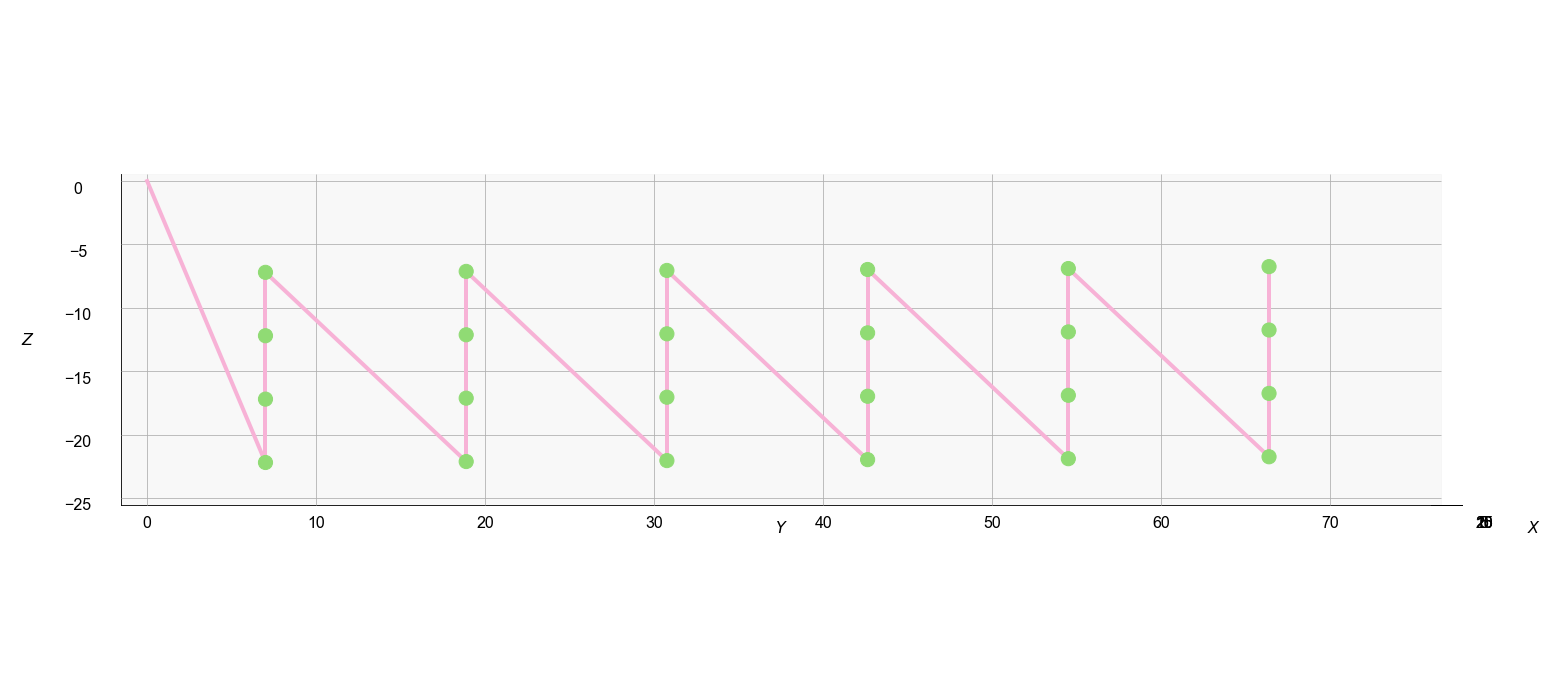

In [13]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(cfg.shopbot.flag1-1)
total.setSpeeds(m=5, j=20)
ylast = '&margin/2'
pic = sc.pics(channel=2, wait=2, lastPt=total)
x = '&slideW/2'
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    for z0frac in [0.9, 0.7, 0.5, 0.3]:
        z = f'-{z0frac}*&slideW+&nid*{spacing}'
#         for dy in range(0,int(pic.floatSC('1.825*&margin')),4):
        for dy in [int(pic.floatSC('1.825*&margin'))/2]:
            pic.m3(x,f'{ylast}+{dy}',z)
            pic.snap()
    ylast = f'{ylast}+2.375*&margin'
total = total+pic

total.turnOff(cfg.shopbot.flag1-1)
total.withdraw()
total.printVolume()
total.plot(ele=0, azi=0, grids=True, export=False)
total.export(os.path.join(SBPFOLDER, 'tripleLinesSide', 'tripleLinesHorizPics.sbp'), [])
# print(total.convertFile('spacing'))

##### disturbHoriz

###### write zig

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz_1.000.sbp
Exported points to C:\Users\lmf1\Documents\G

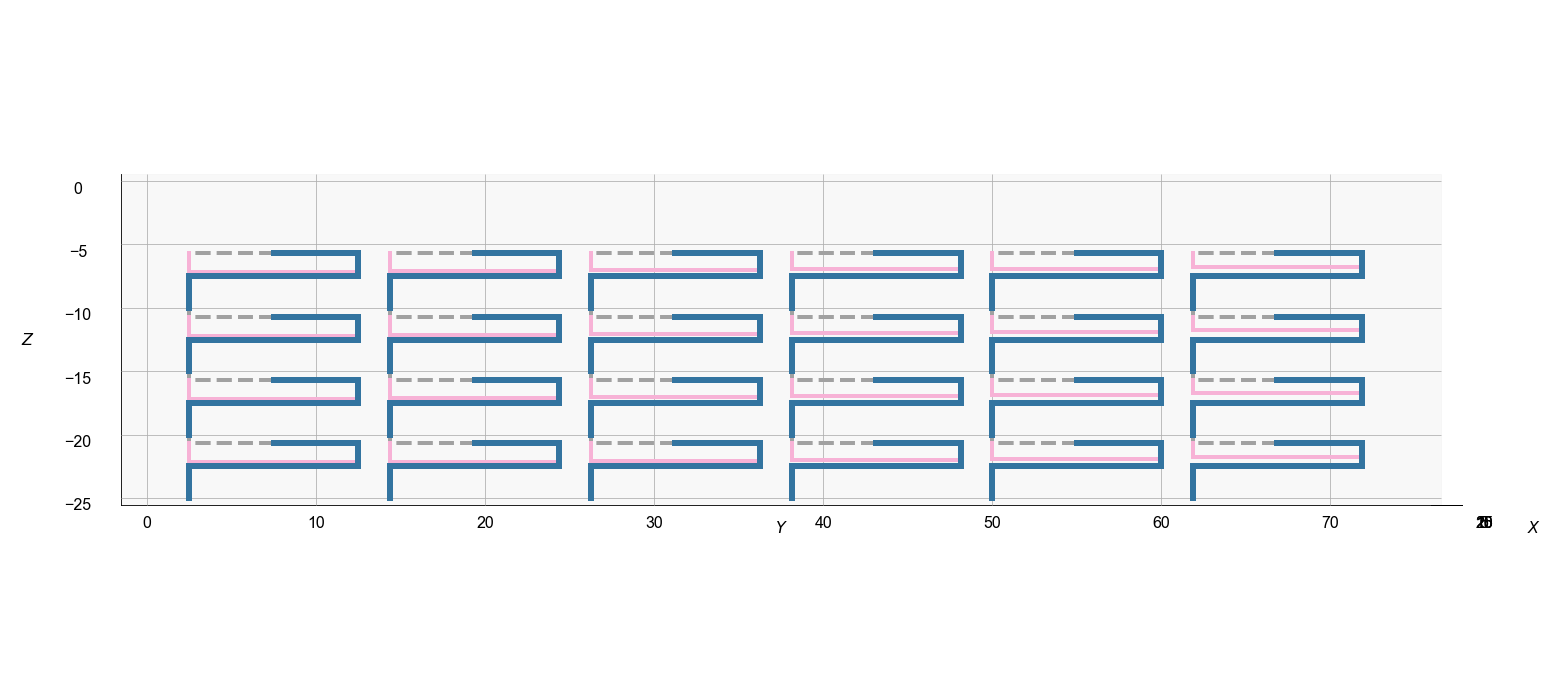

In [22]:
ylast = '&margin/2'
speed=10

total2 = copy.deepcopy(dv)
total2.setSpeeds(m=speed, j=20)
total2.addVar('nid', 0.603)
w = 10
total2.addVar('lineL', w)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
total2.mx('&slideW/2')

# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.setSpeeds(m=speed, j=20)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.prime(0)

    total.m2('&slideW/2', ylast)

    for z0frac in [0.9, 0.7, 0.5, 0.3]:
        zz = sc.sbpCreator(lastPt=total)
        
        # write line 1
        zz.jz(f'-{z0frac+0.1}*&slideW')
        zz.turnOn(0)
        # write line below
        zz.mz(f'-{z0frac}*&slideW', pOn=True)     
        
        # write line
        zz.my(f'{ylast}+{w}', pOn=True)
        zz.mz(f'-{z0frac}*&slideW+&nid*3', pOn=True)
        
        
        # move above
        
        zz.my(f'{ylast}+{w/2}', pOn=True)
        zz.turnOff(0)
        zz.pause(1)
        
        # move line 2
        zz.jy(ylast)
        zz.mz(f'-{z0frac}*&slideW+&nid*{spacing}')
        zz.my(f'{ylast}+{w}')
        
        # move above
        zz.jz(f'-{z0frac}*&slideW+&nid*3')
        zz.my(f'{ylast}+{w/2}')
        zz.pause(1)
        zz.jy(ylast)

        total = total + zz
        total2 = total2 + zz

    ylast = f'{ylast}+2.375*&margin'
    
    total.jz(10)
    total2.jz(10)
    total.turnOff(cfg.shopbot.flag1-1)
    total2.turnOff(cfg.shopbot.flag1-1)
    total.export(os.path.join(SBPFOLDER, 'singleDisturb',  f'disturbHoriz_{spacing:.3f}.sbp'), [])
# print(total.convertFile('spacing'))

total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbHoriz.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

######  write no zig inline

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz2_1.000.sbp
Exported points to C:\Users\lmf1\Do

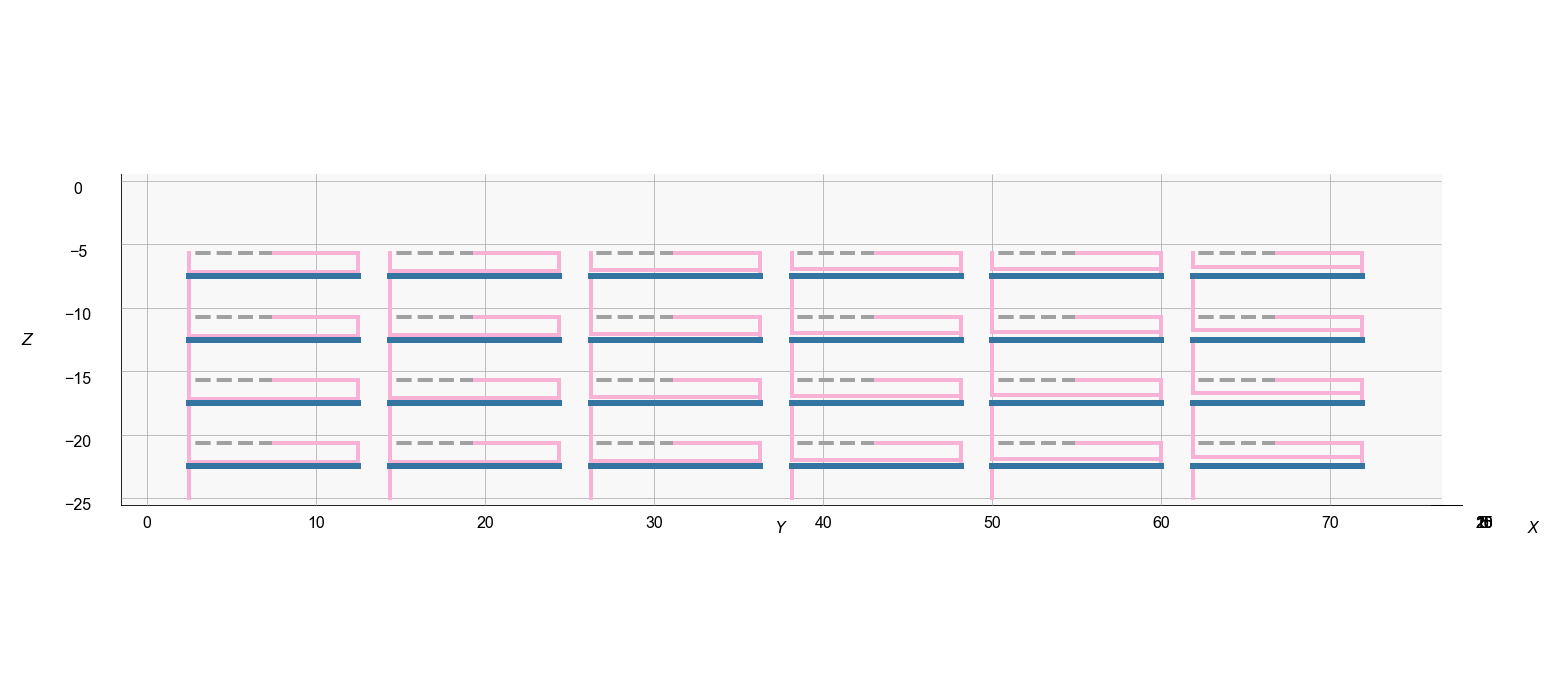

In [14]:
ylast = '&margin/2'
speed=10
dv.setSpeeds(m=speed, j=20)
total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
w = 10
total2.addVar('lineL', w)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
total2.mx('&slideW/2')

# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.prime(0)

    total.m2('&slideW/2', ylast)
    total.jz('-&slideW')

    for z0frac in [0.9, 0.7, 0.5, 0.3]:
        zz = sc.sbpCreator(lastPt=total)
        
        
        zz.mz(f'-{z0frac}*&slideW', pOn=False)     
        zz.turnOn(0)
        # write line
        zz.my(f'{ylast}+{0.9*w}', pOn=True)
        total2.mx('&slideW/2')
        zz.my(f'{ylast}+{w}', pOn=True)
        zz.turnOff(0)
        zz.mz(f'-{z0frac}*&slideW+&nid*3', pOn=False)
        
        
        # move above
        
        zz.my(f'{ylast}+{w/2}', pOn=True)
        
        zz.pause(1)
        
        # move line 2
        zz.jy(ylast)
        zz.mz(f'-{z0frac}*&slideW+&nid*{spacing}')
        zz.my(f'{ylast}+{w}')
        
        # move above
        zz.jz(f'-{z0frac}*&slideW+&nid*3')
        zz.my(f'{ylast}+{w/2}')
        zz.pause(1)
        zz.jy(ylast)

        total = total + zz
        total2 = total2 + zz

    ylast = f'{ylast}+2.375*&margin'
    
    total.jz(10)
    total2.jz(10)
    total.turnOff(cfg.shopbot.flag1-1)
    total2.turnOff(cfg.shopbot.flag1-1)
    total.export(os.path.join(SBPFOLDER, 'singleDisturb',  f'disturbHoriz2_{spacing:.3f}.sbp'), [])
# print(total.convertFile('spacing'))

total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbHoriz2.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

###### write no zig shifted manual

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1.000.sbp
Exported points to C:\Users\lmf1\Do

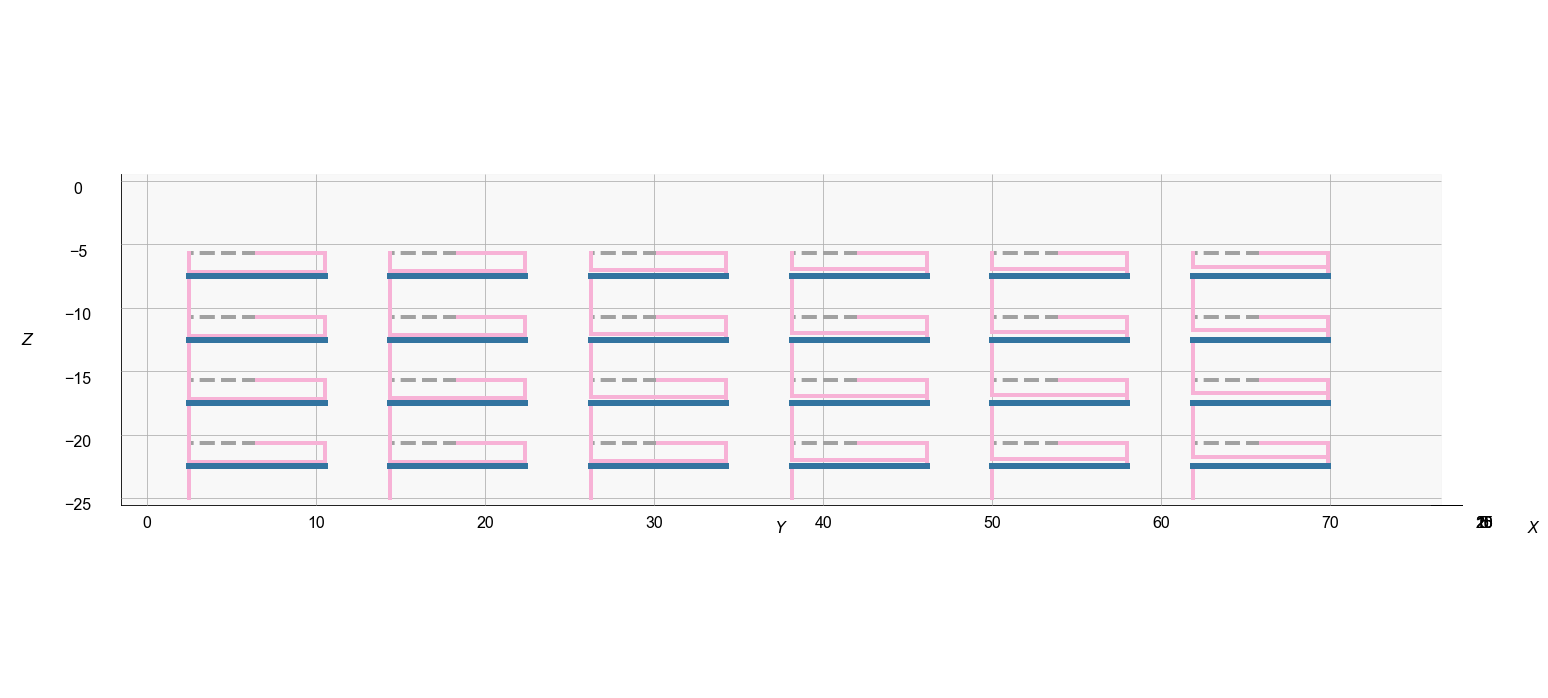

In [60]:
ylast = '&margin/2'
speed=10
wait3 = 3

total2 = copy.deepcopy(dv)
total2.setSpeeds(m=speed, j=20)
total2.addVar('nid', 0.603)
total2.addVar('wait3', wait3)
w = 8
total2.addVar('lineL', w)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
total2.mx('&slideW/2')

# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.setSpeeds(m=speed, j=20)
    total.addVar('nid', 0.603)
    total.addVar('wait3', wait3)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.prime(0)

    total.m2('&slideW/2', ylast)
    total.jz('-&slideW')

    for z0frac in [0.9, 0.7, 0.5, 0.3]:
        zz = sc.sbpCreator(lastPt=total)
        
        zz.mx(f'&slideW/2+{(z0frac-0.6)/0.1}*2')
        zz.mz(f'-{z0frac}*&slideW', pOn=False)     
        zz.turnOn(0)
        # write line
        zz.my(f'{ylast}+{w}', pOn=True)
        zz.turnOff(0)
        zz.mz(f'-{z0frac}*&slideW+&nid*3', pOn=False)
        
        # move above
        zz.my(f'{ylast}+{w/2}', pOn=True)
        
        zz.pause('&wait3')
        
        # move line 2
        zz.jy(ylast)
        zz.mz(f'-{z0frac}*&slideW+&nid*{spacing}')
        zz.my(f'{ylast}+{w}')
        
        # move above
        zz.jz(f'-{z0frac}*&slideW+&nid*3')
        zz.my(f'{ylast}+{w/2}')
        zz.pause('&wait3')
        zz.jy(ylast)

        total = total + zz
        total2 = total2 + zz

    ylast = f'{ylast}+2.375*&margin'
    
    total.jz(10)
    total2.jz(10)
    total.turnOff(cfg.shopbot.flag1-1)
    total2.turnOff(cfg.shopbot.flag1-1)
    total.export(os.path.join(SBPFOLDER, 'singleDisturb',  f'disturbHoriz3_{spacing:.3f}.sbp'), [])
# print(total.convertFile('spacing'))

total2.printVolume()
total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbHoriz3.png'), grids=False)
total2.plot(ele=0, azi=0, export=False, grids=True)

###### write no zig shifted formula

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\singleDisturb\disturbHoriz3_1_1.000.sbp
Exported points t

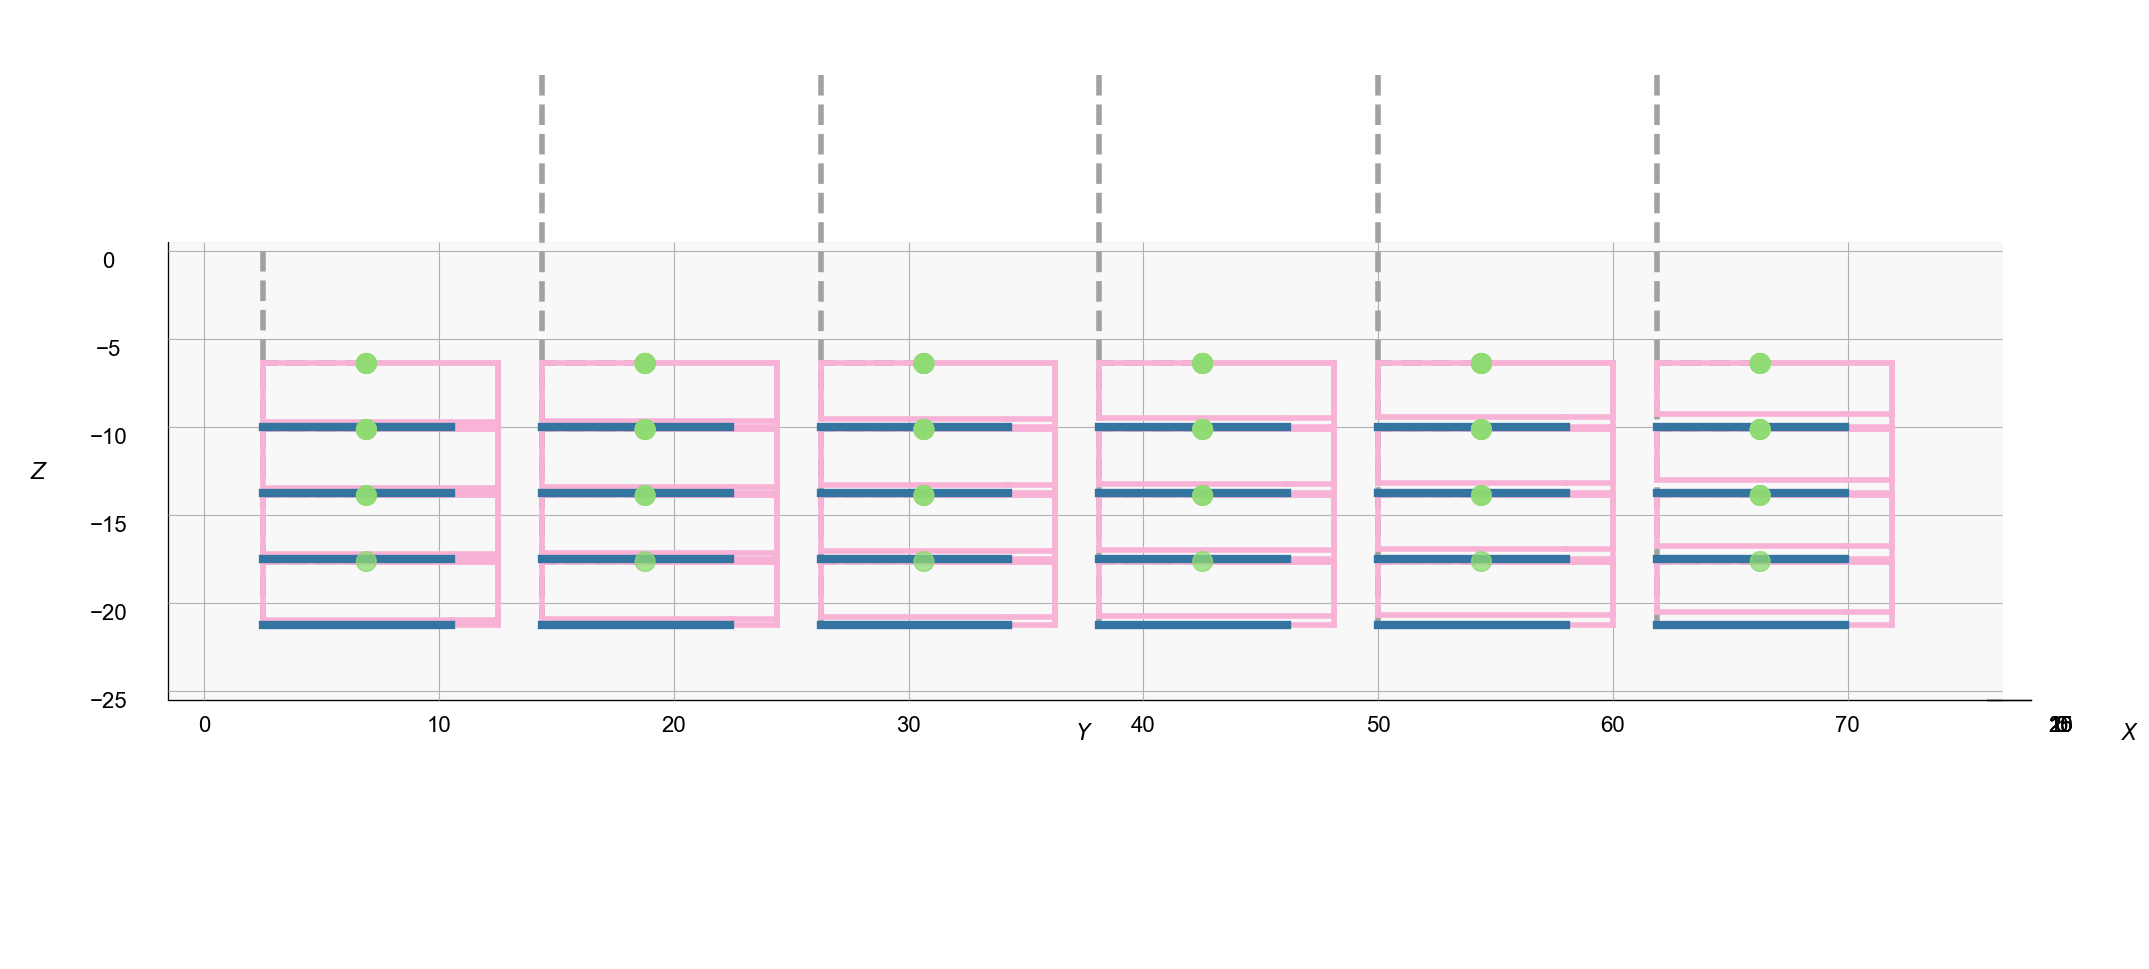

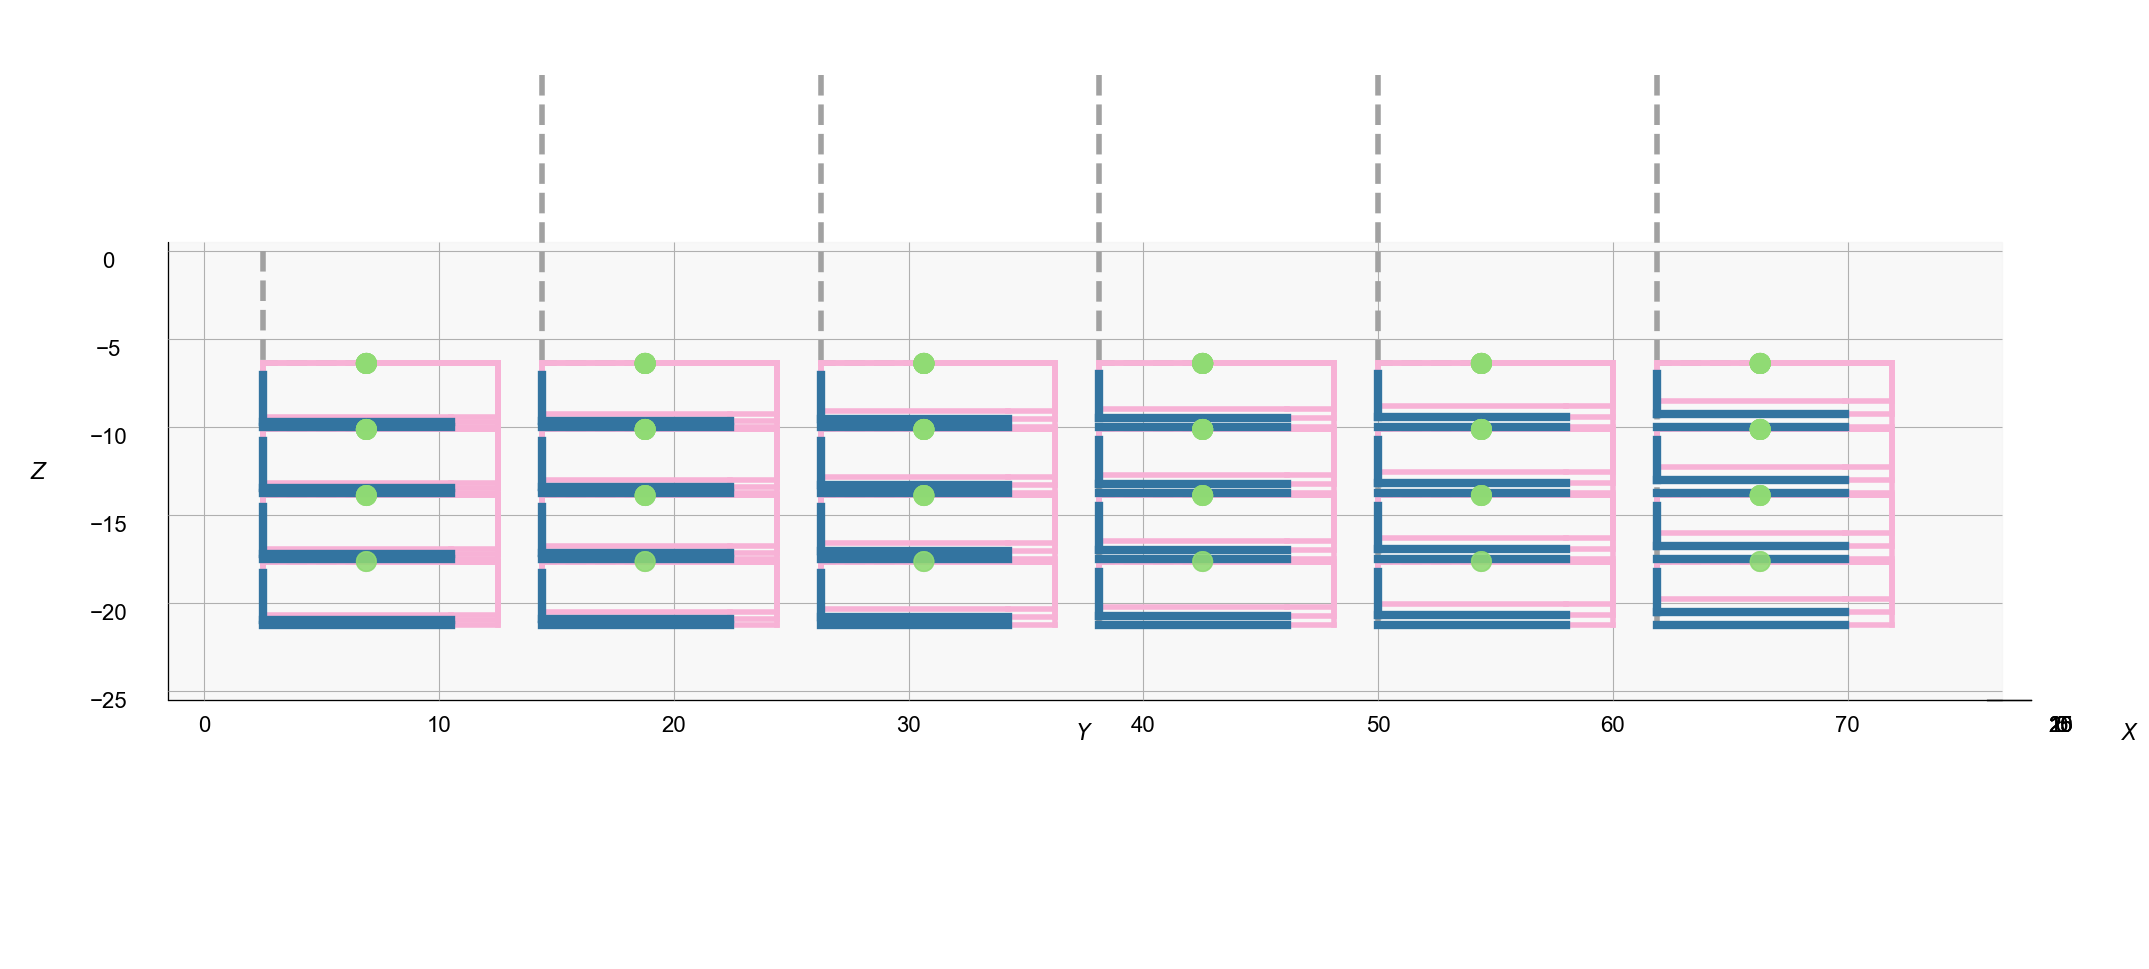

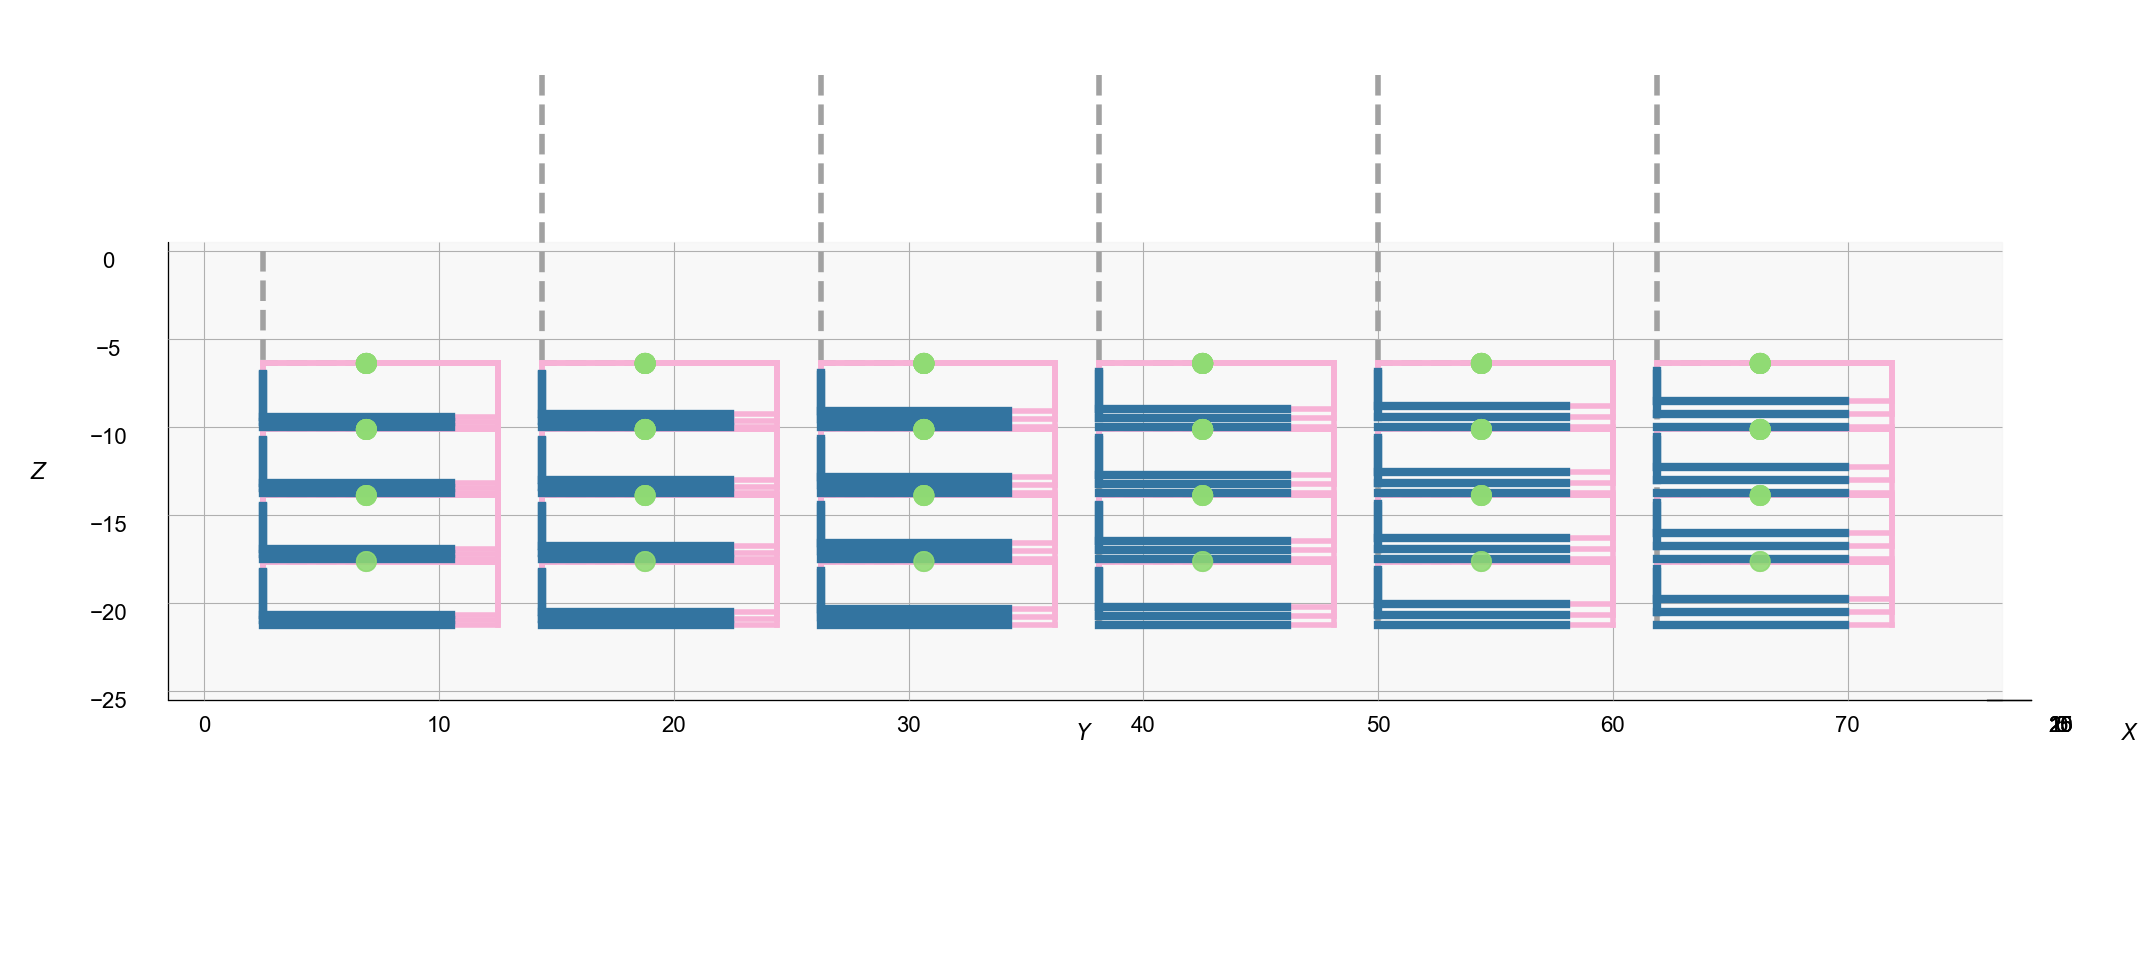

In [17]:
writeLength = 8
for numLines in [1,2,3]:
    ylast = '&margin/2'
    total2 = copy.deepcopy(dv)
    total2 = total2 + sc.startingPoint(0,0,0)
    total2.prime('&dummyFlag1', runFlag1='&runFlag1')
    total2.mx('&slideW/2')
    # head-on, in plane
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.prime('&dummyFlag1', runFlag1='&runFlag1')

        total.m2('&slideW/2', ylast)

        for z0frac in [0.85, 0.7, 0.55, 0.4]:

            x0 = f'&slideW/2+{-(z0frac-0.6)/0.1}*2'
            y0 = ylast
            z0 = f'-{z0frac}*&slideW'

            di = sc.disturb(flowFlag='&flowFlag1', camFlag='&basFlag1'
                            , writeDir='+y', writeLength=writeLength
                            , shiftDir='+z', shiftLength='6*&nid'
                            , distDir='+z', distLength=f'&nid*{spacing}' 
                            , initPt=[x0, y0, z0], shiftFrac=0.45, writeExtend=2
                            , wait1='&waitDPic', wait2='&waitDSnap', wait3='&waitDO'
                            , lastPt=total, numLines=numLines, turnOnFrac = 0.2, turnOnWait=0, turnOffWait=0)
            di.jz(z0)
            di.sbp()
            di.jy(ylast)

            total = total + di
            total2 = total2+di       

        ylast = f'{ylast}+2.375*&margin'

        total.jz(10)
        total2.jz(10)
        total.turnOff('&runFlag1')
        total.export(os.path.join(SBPFOLDER, 'singleDisturb',  f'disturbHoriz3_{numLines}_{spacing:.3f}.sbp'), [])
    # print(total.convertFile('spacing'))

    total2.printVolume()
    total2.plot(ele=10, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'disturbHoriz3_{numLines}.png'), grids=False)
    total2.plot(ele=0, azi=0, export=False, grids=True)

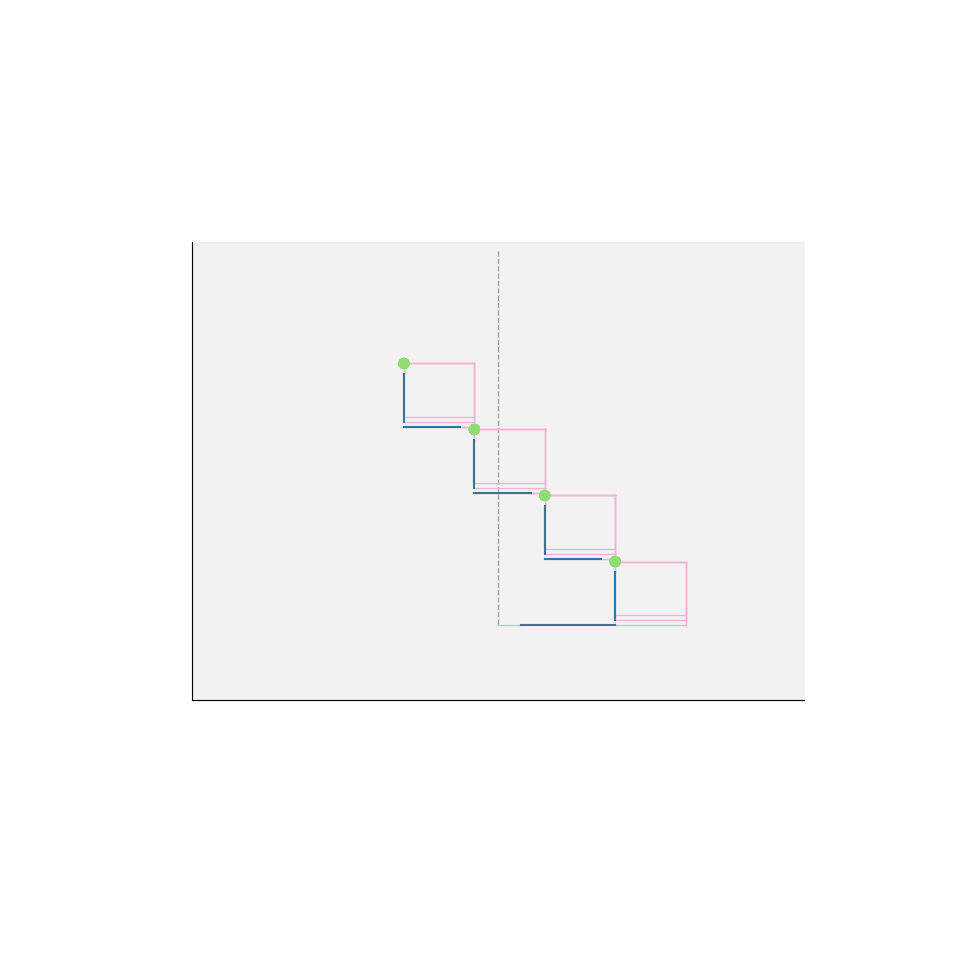

In [16]:
total2.plot(azi=90, ele=0)

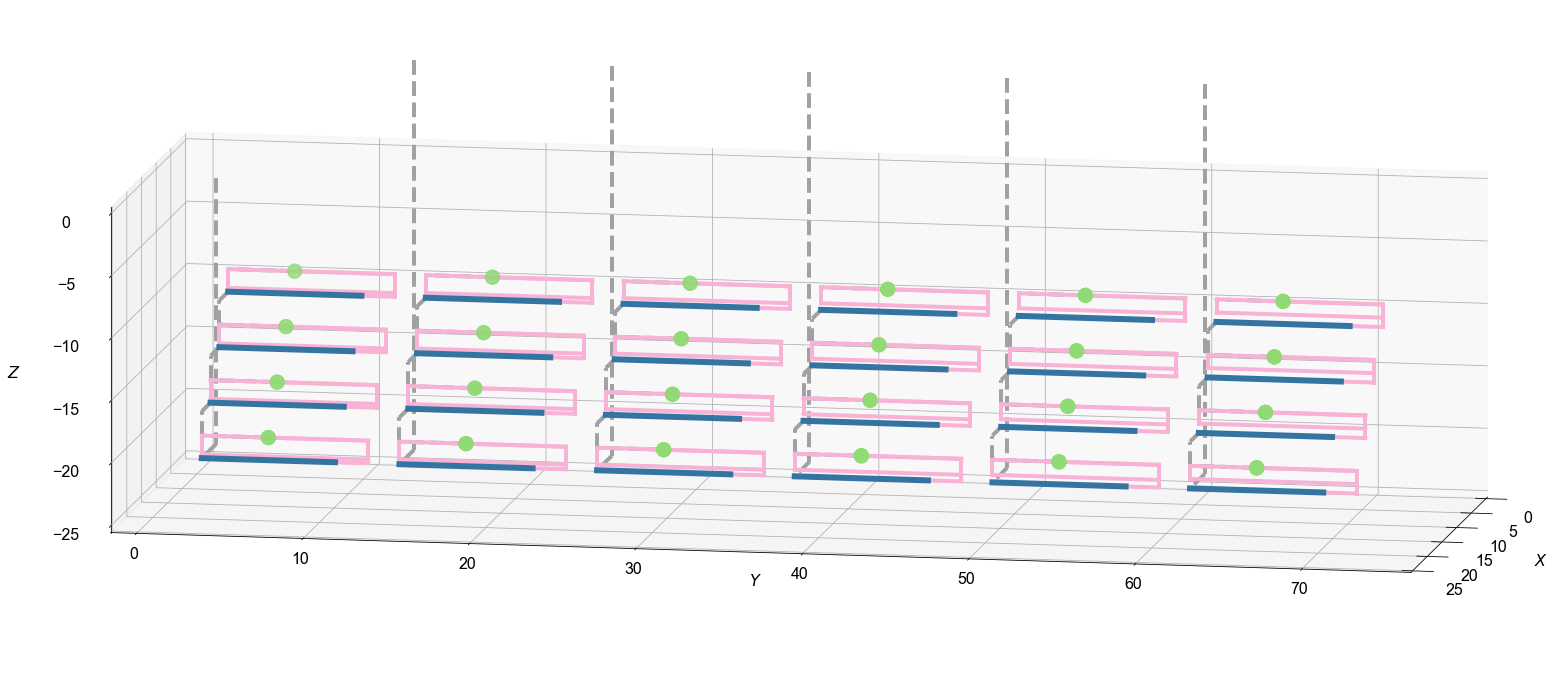

In [151]:
total2.plot(ele=10, azi=10, export=False, grids=True)

##### tripleLinesUnder

###### writing

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnder_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnder_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnder_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnder_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnder_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnder_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnder_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnder_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLi

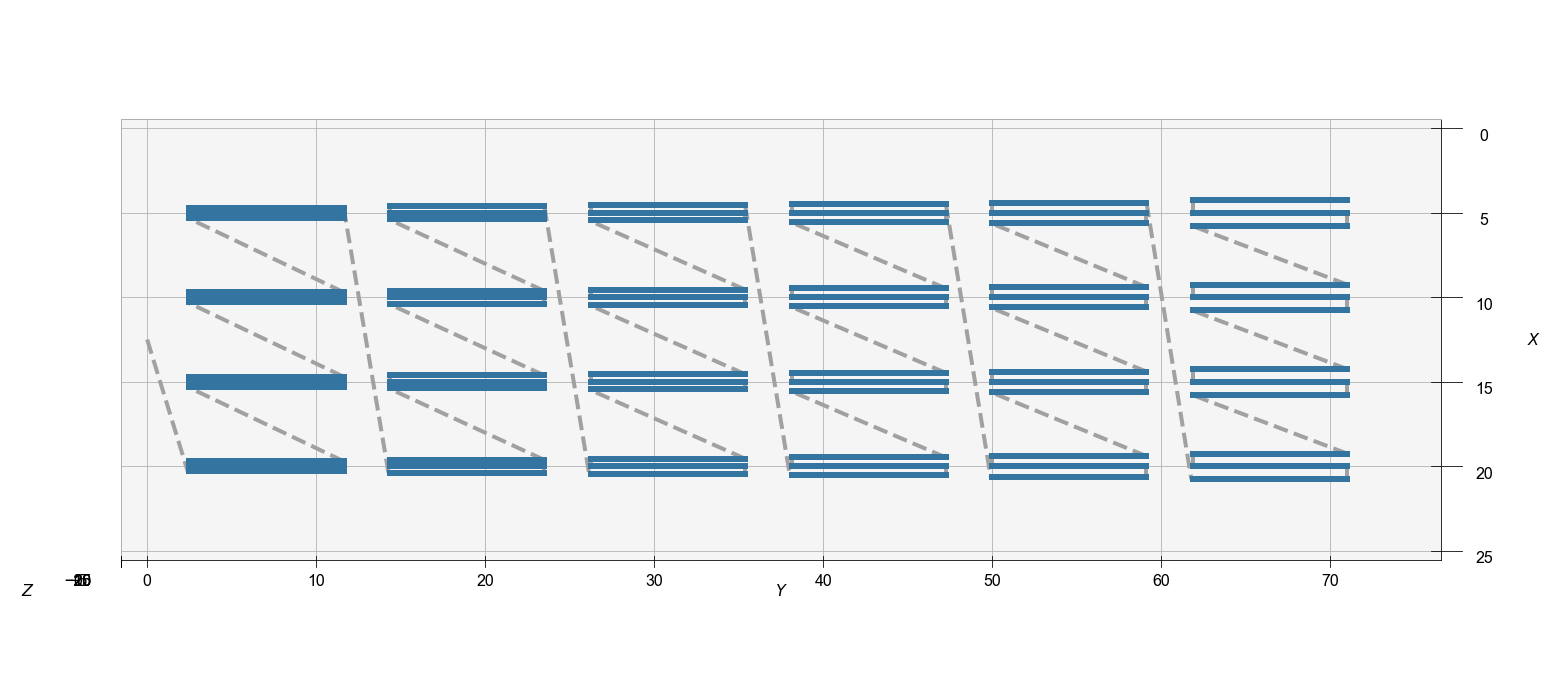

In [9]:
ylast = '&margin/2'

total2 = copy.deepcopy(dv)
total2.addVar('nid', 0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)
total2.mx('&slideW/2')
    
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    total = copy.deepcopy(dv)
    total.addVar('nid', 0.603)
    total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
    total.prime(0)

    total.mz('-&slideW/2')

    for z0frac in [0.8, 0.6, 0.4, 0.2]:
        zz = sc.zigzag(lastPt=total, killZigs=True)
        zz.z0 = '-&slideW/2'
        zz.y0 = ylast
        zz.x0 = f'{z0frac}*&slideW+&nid*{spacing}'
        zz.width='1.825*&margin'
        zz.spacing1 = f'&nid*{spacing}'
        zz.spacing2 = f'&nid*{spacing}'
        zz.reps=3
        zz.shortdir = '-x'
        zz.longdir = '+y'
        zz.sbp()
        ylasti = zz.cp[1]
        total = total + zz
        total2 = total2 + zz

    ylast = f'{ylast}+2.375*&margin'
    total.jz(10)
    total2.jz(10)
    total.turnOff(cfg.shopbot.flag1-1)
    total2.turnOff(cfg.shopbot.flag1-1)
    total.export(os.path.join(SBPFOLDER, 'tripleLinesUnder', f'tripleLinesUnder_{spacing:.3f}.sbp'), [])


total2.printVolume()
total2.plot(ele=80, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'tripleLinesUnder.png'), grids=False)
total2.plot(ele=90, azi=0, export=False, grids=True)

###### pics

0.000 mL, 3 min 48 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnderPics.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\tripleLinesUnderPics.csv


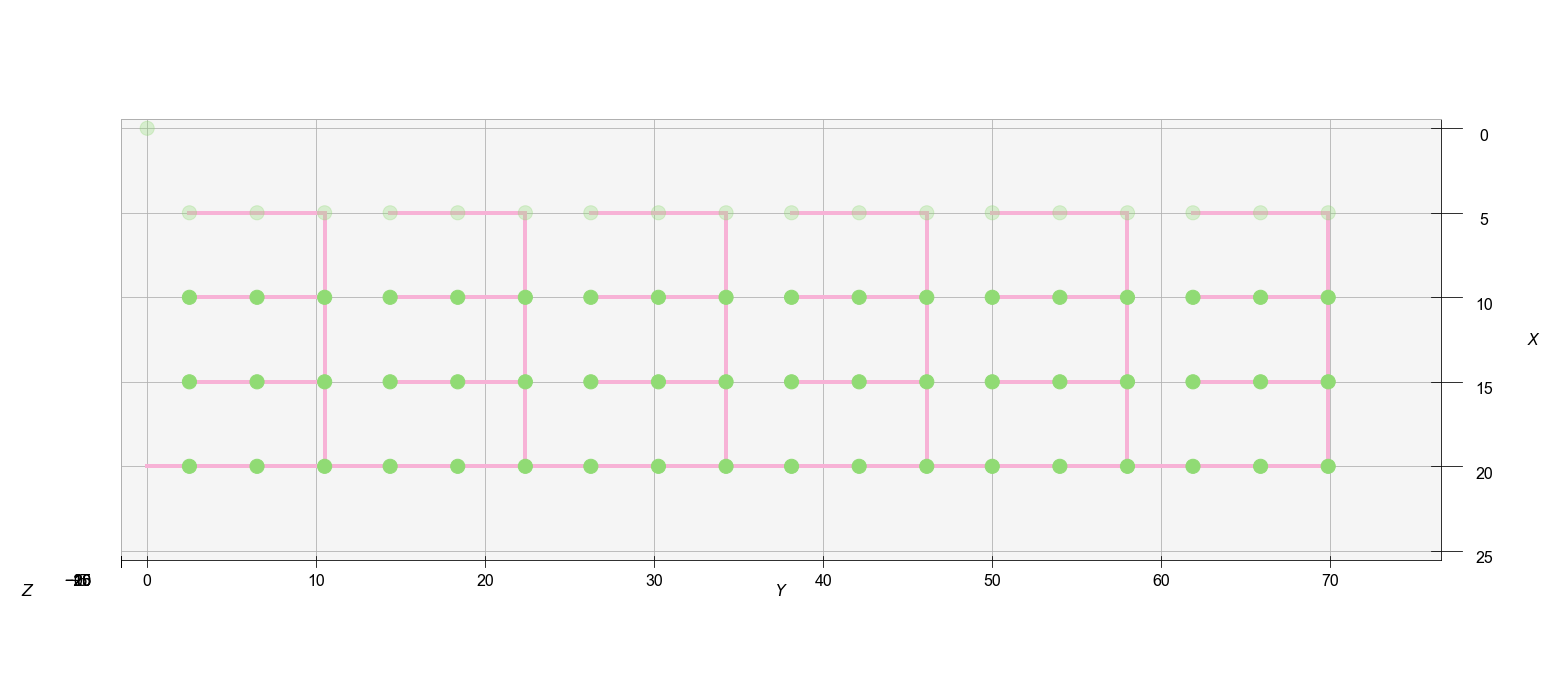

In [15]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(cfg.shopbot.flag1-1)
total.setSpeeds(m=5, j=20)
ylast = '&margin/2'
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mz('-&slideW/2')
pic.snap()
# head-on, in plane
for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
    for z0frac in [0.8, 0.6, 0.4, 0.2]:
        pic.mx(f'{z0frac}*&slideW')
        for dy in range(0,int(pic.floatSC('1.825*&margin')),4):
            pic.my(f'{ylast}+{dy}')
            pic.snap()
    ylast = f'{ylast}+2.375*&margin'
total = total+pic

total.turnOff(cfg.shopbot.flag1-1)
total.withdraw()
total.printVolume()
total.plot(ele=90, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER, 'tripleLinesUnder', 'tripleLinesUnderPics.sbp'), [])
# print(total.convertFile('spacing'))

##### underCross

###### writing

Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_0.500.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_0.500.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_0.625.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_0.625.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_0.750.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_0.750.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_0.875.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_0.875.csv
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnder_0.5_1.000.sbp

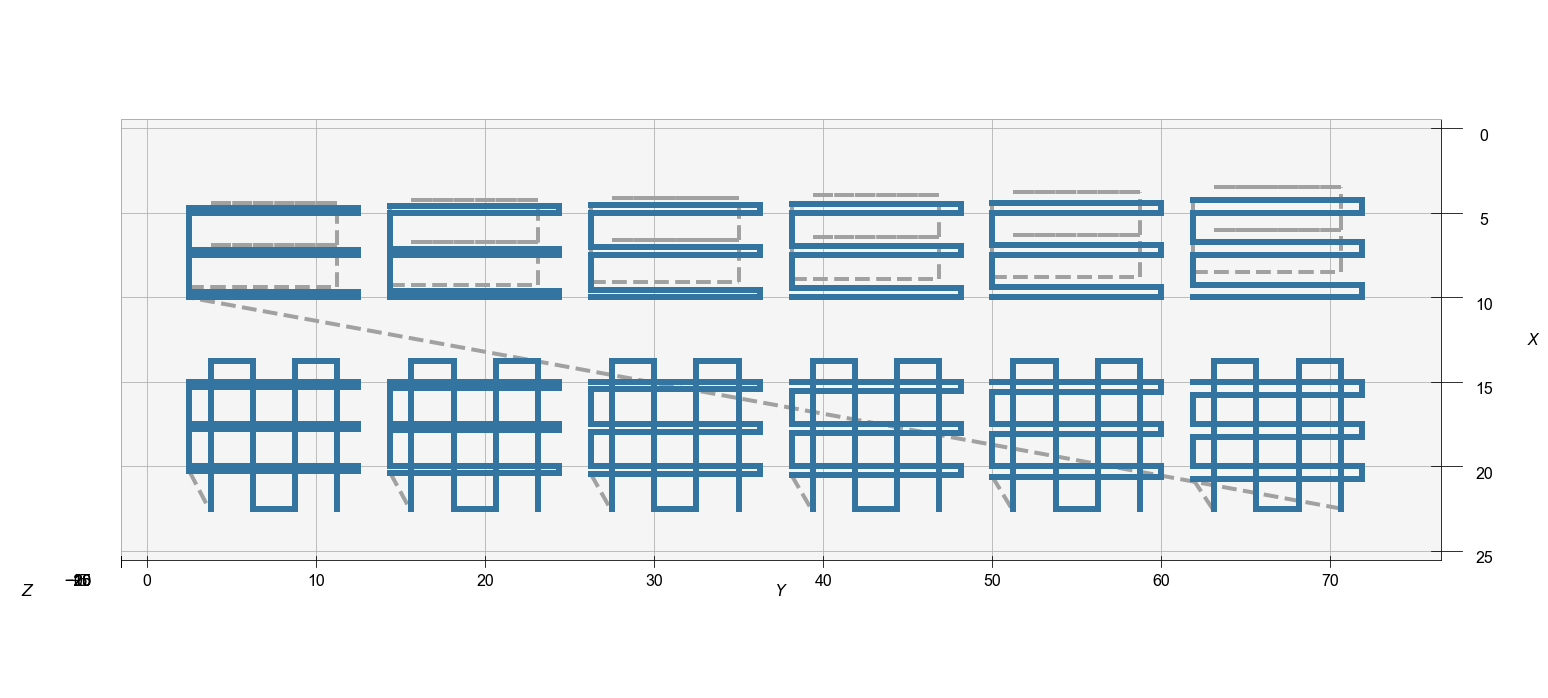

In [10]:
total2 = copy.deepcopy(dv)
total2.addVar('nid',0.603)
total2 = total2 + sc.startingPoint(0,0,0)
total2.turnOn(cfg.shopbot.flag1-1)

zmed = -slideW/2
# head-on, in plane
for z0frac in [0.5, 0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        total = copy.deepcopy(dv)
        total.addVar('nid',0.603)
        total = total + sc.startingPoint(total2.cp[0], total2.cp[1], total2.cp[2])
        total.prime(0)
        
        # bottom: double zigzag, then verts
        zz4 = sc.zigzag(lastPt = total, killZigs=False)
        zz4.spacing2 = f'{spacing}*&nid'
        zz4.spacing1 = f'&margin/2-{spacing}*&nid'
        zz4.width='2*&margin'
        zz4.z0 = zmed
        zz4.y0 = ylast
        zz4.x0 = f'&slideW/2-(0.25-{z0frac})/0.5*&margin'
        zz4.longdir = '+y'
        if z0frac==0.5:
            zz4.shortdir = '+x'
        else:
            zz4.shortdir = '-x'
        zz4.reps=6
        total = total + zz4
        total2 = total2 + zz4
        
        ylast = sc.p(ylast,'&margin*2.375')
            
        if z0frac==0.5:     
            # zag
            v1 = sc.zigzag(lastPt = total, killZigs=False)
            v1.spacing2 = f'&margin/2'
            v1.spacing1 = f'&margin/2'
            v1.width='&slideW/2-3/4*&margin'
            v1.z0 = sc.p(zmed, f'{spacing}*&nid')
            total.mz(v1.z0)
            v1.y0 = sc.p('&margin/4', zz4.cp[1])
            v1.x0 = f'&slideW-&margin/2'
            v1.longdir = '-x'
            v1.shortdir = '+y'
            v1.reps=4
            total = total + v1
            total2 = total2+v1
        else:
            # vertical lines
            for xi in range(3):
                v1 = sc.verts(lastPt=total)
                v1.upDownRowReps(direc='+y', p0=sc.p(f'&margin/4', zz4.cp[1])
                                 , const=f'-{spacing}*&nid*(2+{xi})+&slideW/2-&margin/2-(&margin/2-{spacing}*&nid)*{xi}', spacing='&margin/2', reps=4)
                v1.zmax = f'-&slideW/2+&margin/2'
                v1.zmin = f'-&slideW/2-&margin/2'
                v1.downdisp = 0
                total = total + v1
                total2 = total2+v1
                
            
        # draw zigzag on each pair
    
        

        
        total.jz(10)
        total2.jz(10)
        total2.turnOff(cfg.shopbot.flag1-1)
        total.turnOff(cfg.shopbot.flag1-1)
        total.export(os.path.join(SBPFOLDER,'tripleLinesUnder',  f'crossUnder_{z0frac}_{spacing:.3f}.sbp'), [])
        
    total.mz(f'-&slideW*{z0frac}')
    total2.mz(f'-&slideW*{z0frac}')

total2.printVolume()
total2.plot(ele=80, azi=10, export=True, fn=os.path.join(r'C:\Users\lmf1\OneDriveNIST\NIST\data\shopbot\results\tripleLines', f'crossUnder.png'), grids=False)
total2.plot(ele=90, azi=0, export=False, grids=True)
# print(total.convertFile('spacing'))

###### pics

0.000 mL, 5 min 18 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnderPics.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\tripleLinesUnder\crossUnderPics.csv


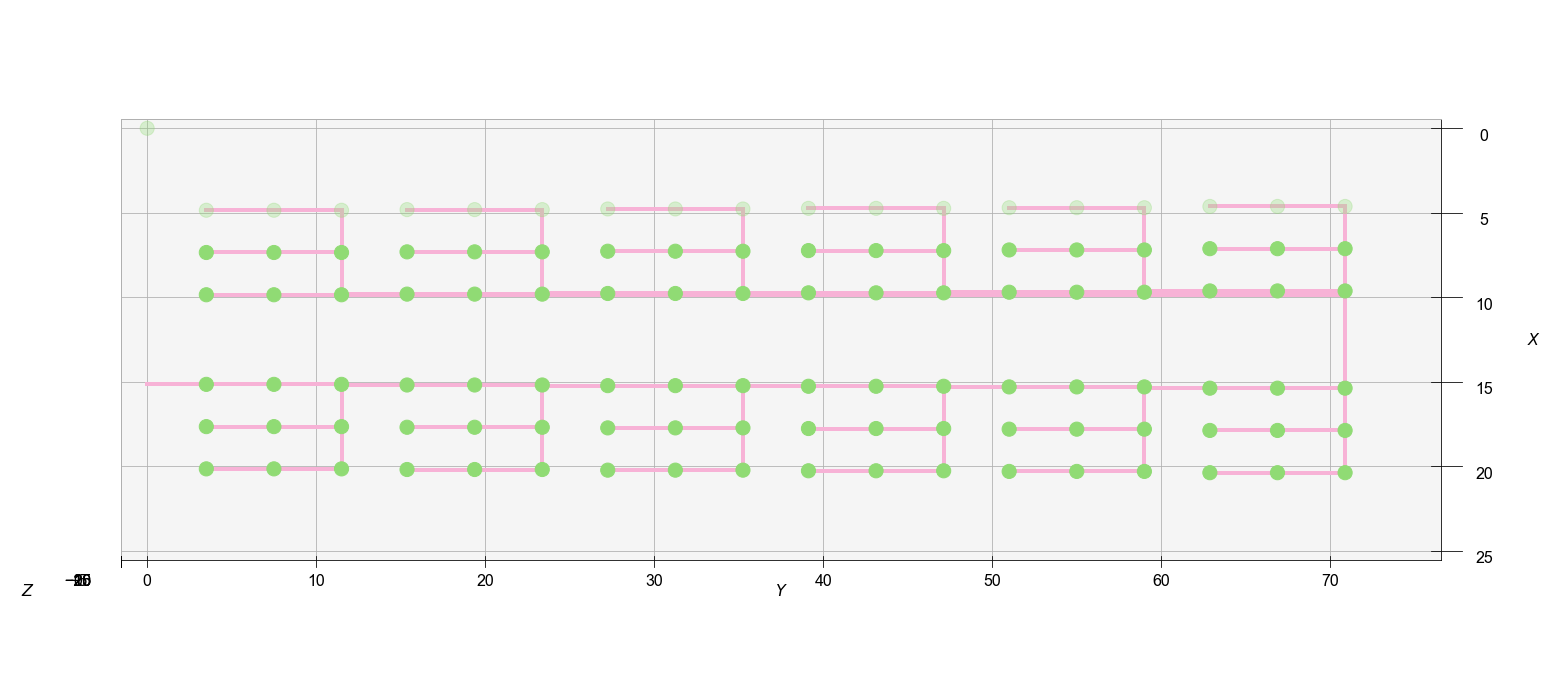

In [17]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(cfg.shopbot.flag1-1)
total.setSpeeds(m=5, j=20)

zmed = -slideW/2
pic = sc.pics(channel=2, wait=2, lastPt=total)
pic.mz('-&slideW/2')
pic.snap()
# head-on, in plane
for z0frac in [0.5,0]:
    ylast = '&margin/2'
    for i,spacing in enumerate([0.5, 0.625, 0.75, 0.875, 1, 1.25]):
        for xi in range(3):
            x0 = f'&slideW/2-(0.25-{z0frac})/0.5*&margin'
            spacing1 = f'{spacing}*&nid'
            spacing2 = f'&margin/2-{spacing}*&nid'
            if z0frac==0:
                pic.mx(f'{x0}-{spacing1}/2-({spacing1}+{spacing2})*{xi}')
            else:
                pic.mx(f'{x0}+{spacing1}/2+({spacing1}+{spacing2})*{xi}')
            for dy in range(0, int(pic.floatSC('2*&margin')), 4):
                pic.my(f'{ylast}+{dy}+1')
                pic.snap()
        ylast = sc.p(ylast,'&margin*2.375')
total = total+pic
total.turnOff(cfg.shopbot.flag1-1)
total.withdraw()
total.printVolume()
total.plot(ele=90, azi=0, export=False, grids=True)
total.export(os.path.join(SBPFOLDER, 'tripleLinesUnder', 'crossUnderPics.sbp'), [])
# print(total.convertFile('spacing'))

#### test

0.006 mL, 0 min 9 s
Exported file C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\t_test.sbp
Exported points to C:\Users\lmf1\Documents\GitHub\ShopbotPyQt\SBP_files\t_test.csv


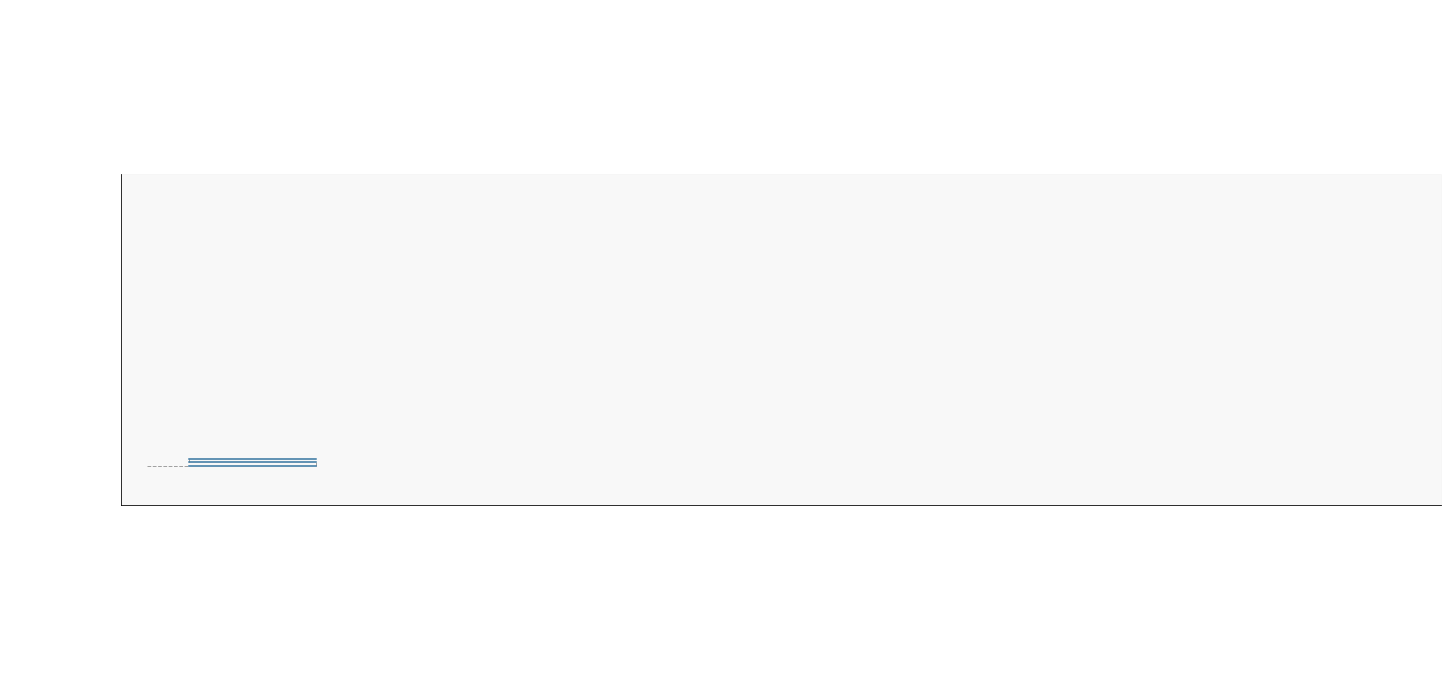

In [18]:
total = copy.deepcopy(dv)
total.addVar('nid', 0.603)
total = total + sc.startingPoint(0,0,0)
total.turnOn(cfg.shopbot.flag1-1)

ylast = '&margin/2'
total.mx('&slideW/2')
# head-on, in plane
for i,spacing in enumerate([0.5]):
    for z0frac in [0.9]:
# for i,spacing in enumerate([0.5]):
#     for z0frac in [0.9]:
        zz = sc.zigzag(lastPt=total, killZigs=True)
        zz.x0 = '&slideW/2'
        zz.y0 = ylast
        zz.z0 = f'-{z0frac}*&slideW'
        zz.width='1.5*&margin'
        zz.spacing1 = f'&nid*{spacing}'
        zz.spacing2 = f'&nid*{spacing}'
        zz.reps=3
        zz.mz(zz.z0)
        zz.shortdir = '+z'
        zz.longdir = '+y'
        total = total + zz
    ylast = zz.cp[1]
    ylast = f'{ylast}+&margin'


total.turnOff(cfg.shopbot.flag1-1)
total.mz(10)
total.printVolume()
total.plot(ele=0, azi=0)
total.export(os.path.join(SBPFOLDER, 't_test.sbp'), [])
# print(total.convertFile('spacing'))